<a href="https://colab.research.google.com/github/GarvinAgweli/personal/blob/main/SPOTIFY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings as w
w.filterwarnings('ignore')
pd.set_option('display.max_column',None)

In [ ]:
#load dataset
df=pd.read_csv('dataset.csv')
df.sample(5)

index                track_id  \
14658    14658  2tZUOYK2y7WNhArsa3oxUn   
46608    46608  1zxjVoB2ltR90sjuZ6phvR   
51047    51047  4HdzYTQiouB9BVYX7JOrhh   
101483  101483  0MgnRvmrRE0c9kqUcDRySj   
74062    74062  6XymeWgTguSv5cz9LuDclr   

                                                  artists  \
14658                                        Patty Shukla   
46608                                                S3RL   
51047                          Anirudh Ravichander;Rokesh   
101483  White Noise Therapy;Rain Sounds;Natural White ...   
74062                           Nando Reis;Andrea Martins   

                                               album_name  \
14658                                   Roar Like a Lion!   
46608                                  MTC Saga (DJ Edit)   
51047                          Jalabulajangu (From "Don")   
101483  Rain Drop Medley of Roof, Thunder, Forest, Car...   
74062                  Luau (Ao Vivo Em São Paulo / 2007)   

                                         track_name  popularity  duration_ms  \
14658                                Shake and Move          46       164000   
46608                            MTC Saga - DJ Edit          19       244207   
51047                    Jalabulajangu (From "Don")          71       202607   
101483           Pure Brown Noise with Pouring Rain          37        61020   
74062   Luz Dos Olhos - Ao Vivo Em São Paulo / 2007          49       306813   

        explicit  danceability   energy  key  loudness  mode  speechiness  \
14658      False         0.795  0.51100    7    -8.577     1       0.0415   
46608      False         0.560  0.92600    0    -2.424     1       0.3440   
51047      False         0.635  0.82300    7    -5.437     0       0.1530   
101483     False         0.000  0.00002    2   -14.510     1       0.0000   
74062      False         0.467  0.69400    7    -6.637     1       0.0304   

        acousticness  instrumentalness  liveness  valence    tempo  \
14658        0.29800          0.000000    0.1490    0.113  119.908   
46608        0.00146          0.000402    0.0257    0.737  175.079   
51047        0.02610          0.000000    0.0481    0.457  151.047   
101483       0.00000          0.000000    0.8380    0.000    0.000   
74062        0.46000          0.000000    0.7470    0.336   91.008   

        time_signature track_genre  
14658                4    children  
46608                4       happy  
51047                4     hip-hop  
101483               0       sleep  
74062                4         mpb

In [ ]:
df.shape

(114000, 21)

In [ ]:
df.columns

Index(['index', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [ ]:
df.describe(include='all')

index                track_id      artists  \
count   114000.000000                  114000       113999   
unique            NaN                   89741        31437   
top               NaN  6S3JlDAGk3uu3NtZbPnuhS  The Beatles   
freq              NaN                       9          279   
mean     56999.500000                     NaN          NaN   
std      32909.109681                     NaN          NaN   
min          0.000000                     NaN          NaN   
25%      28499.750000                     NaN          NaN   
50%      56999.500000                     NaN          NaN   
75%      85499.250000                     NaN          NaN   
max     113999.000000                     NaN          NaN   

                        album_name       track_name     popularity  \
count                       113999           113999  114000.000000   
unique                       46589            73608            NaN   
top     Alternative Christmas 2022  Run Rudolph Run            NaN   
freq                           195              151            NaN   
mean                           NaN              NaN      33.238535   
std                            NaN              NaN      22.305078   
min                            NaN              NaN       0.000000   
25%                            NaN              NaN      17.000000   
50%                            NaN              NaN      35.000000   
75%                            NaN              NaN      50.000000   
max                            NaN              NaN     100.000000   

         duration_ms explicit   danceability         energy            key  \
count   1.140000e+05   114000  114000.000000  114000.000000  114000.000000   
unique           NaN        2            NaN            NaN            NaN   
top              NaN    False            NaN            NaN            NaN   
freq             NaN   104253            NaN            NaN            NaN   
mean    2.280292e+05      NaN       0.566800       0.641383       5.309140   
std     1.072977e+05      NaN       0.173542       0.251529       3.559987   
min     0.000000e+00      NaN       0.000000       0.000000       0.000000   
25%     1.740660e+05      NaN       0.456000       0.472000       2.000000   
50%     2.129060e+05      NaN       0.580000       0.685000       5.000000   
75%     2.615060e+05      NaN       0.695000       0.854000       8.000000   
max     5.237295e+06      NaN       0.985000       1.000000      11.000000   

             loudness           mode    speechiness   acousticness  \
count   114000.000000  114000.000000  114000.000000  114000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        -8.258960       0.637553       0.084652       0.314910   
std          5.029337       0.480709       0.105732       0.332523   
min        -49.531000       0.000000       0.000000       0.000000   
25%        -10.013000       0.000000       0.035900       0.016900   
50%         -7.004000       1.000000       0.048900       0.169000   
75%         -5.003000       1.000000       0.084500       0.598000   
max          4.532000       1.000000       0.965000       0.996000   

        instrumentalness       liveness        valence          tempo  \
count      114000.000000  114000.000000  114000.000000  114000.000000   
unique               NaN            NaN            NaN            NaN   
top                  NaN            NaN            NaN            NaN   
freq                 NaN            NaN            NaN            NaN   
mean            0.156050       0.213553       0.474068     122.147837   
std             0.309555       0.190378       0.259261      29.978197   
min             0.000000       0.000000       0.000000       0.000000   
25%             0.000000       0.098000       0.260000      99.21875

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
#CLEANING DATASET
df=df.drop(columns=['index','track_id'])
df.sample()

artists                   album_name              track_name  \
112739  Cem Adrian  2020 Model: Murathan Mungan  Eskidendi, Çok Eskiden   

        popularity  duration_ms  explicit  danceability  energy  key  \
112739          38       303454     False         0.301   0.348    9   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
112739    -7.349     0       0.0454         0.825               0.0     0.118   

        valence  tempo  time_signature track_genre  
112739    0.354  175.3               3     turkish

In [ ]:
df.duplicated().sum()

np.int64(577)

In [ ]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
df.dropna()

artists  \
0                  Gen Hoshino   
1                 Ben Woodward   
2       Ingrid Michaelson;ZAYN   
3                 Kina Grannis   
4             Chord Overstreet   
...                        ...   
113995           Rainy Lullaby   
113996           Rainy Lullaby   
113997           Cesária Evora   
113998        Michael W. Smith   
113999           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700   0.4130  135.960               4   
113999          0.000000    0.0893   0.7080   79.198               4   

        track_genre  
0          acoustic  
1          acoustic  
2          acoustic  
3          acoustic  
4          acoustic  
...             ...  
113995  world-music  
11

In [ ]:
df.nunique()

artists             31437
album_name          46589
track_name          73608
popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45653
time_signature          5
track_genre           114
dtype: int64

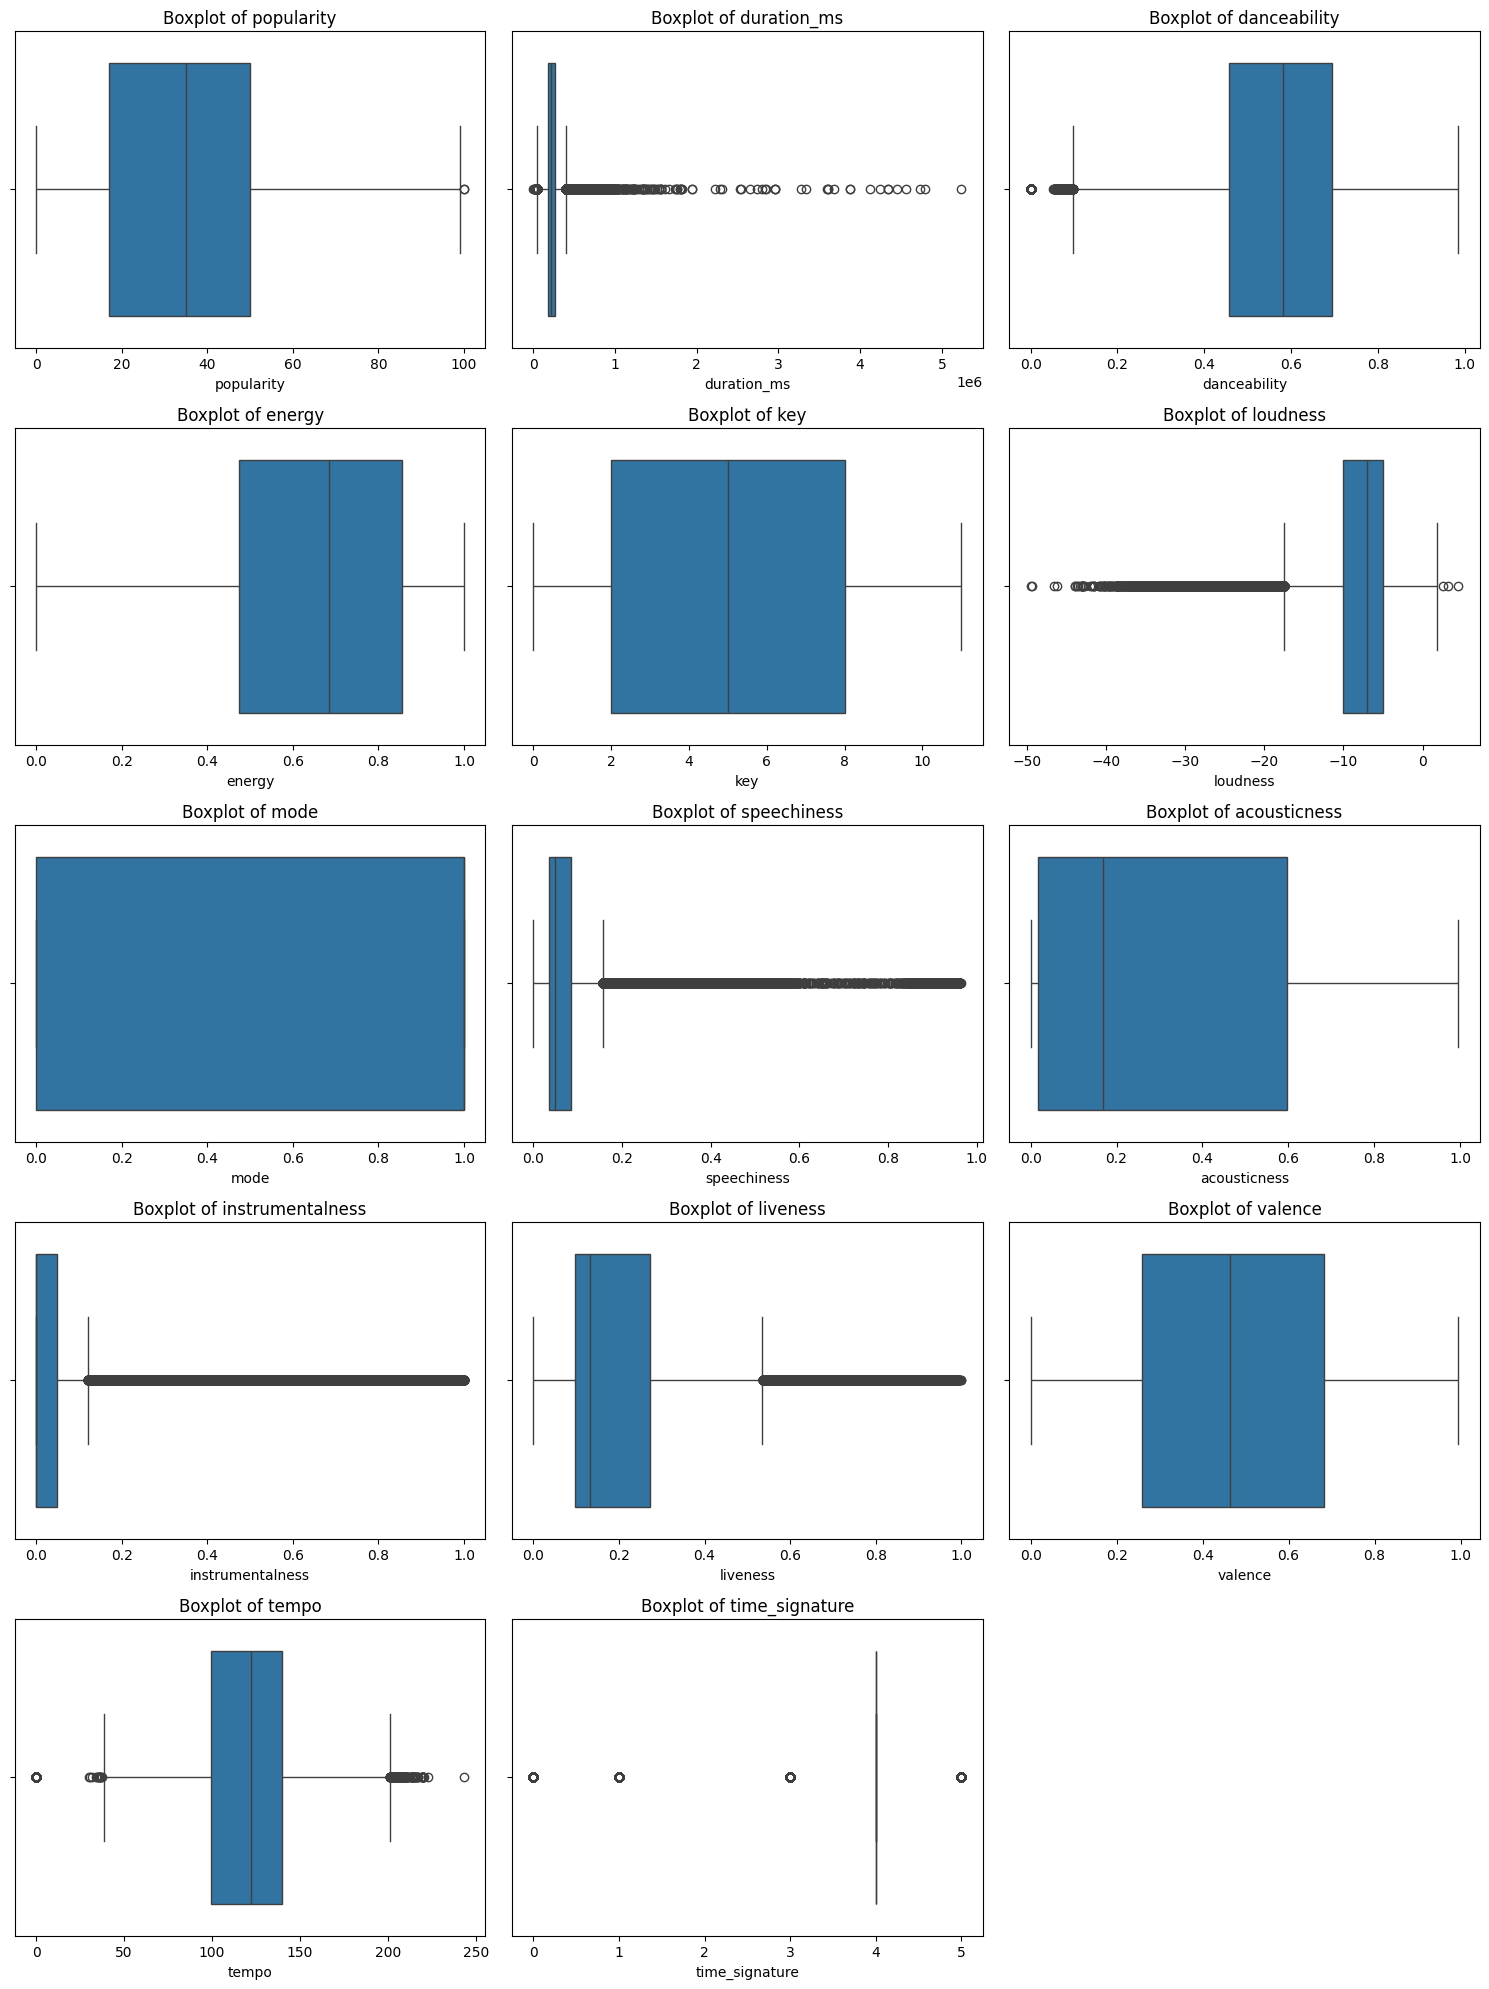

In [ ]:
#ANALYSIS OF DATA
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False)

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# only numerical data
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# capping of each column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Winsorization: clip values to lower/upper limit
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

print("Outliers handled with Winsorization using IQR:")
print(df.head())

Outliers handled with Winsorization using IQR:
                  artists                                         album_name  \
0             Gen Hoshino                                             Comedy   
1            Ben Woodward                                   Ghost (Acoustic)   
2  Ingrid Michaelson;ZAYN                                     To Begin Again   
3            Kina Grannis  Crazy Rich Asians (Original Motion Picture Sou...   
4        Chord Overstreet                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy        73.0     230666.0     False   
1            Ghost - Acoustic        55.0     149610.0     False   
2              To Begin Again        57.0     210826.0     False   
3  Can't Help Falling In Love        71.0     201933.0     False   
4                     Hold On        82.0     198853.0     False   

   danceability  energy  key  loudness  mode  speechiness  acou

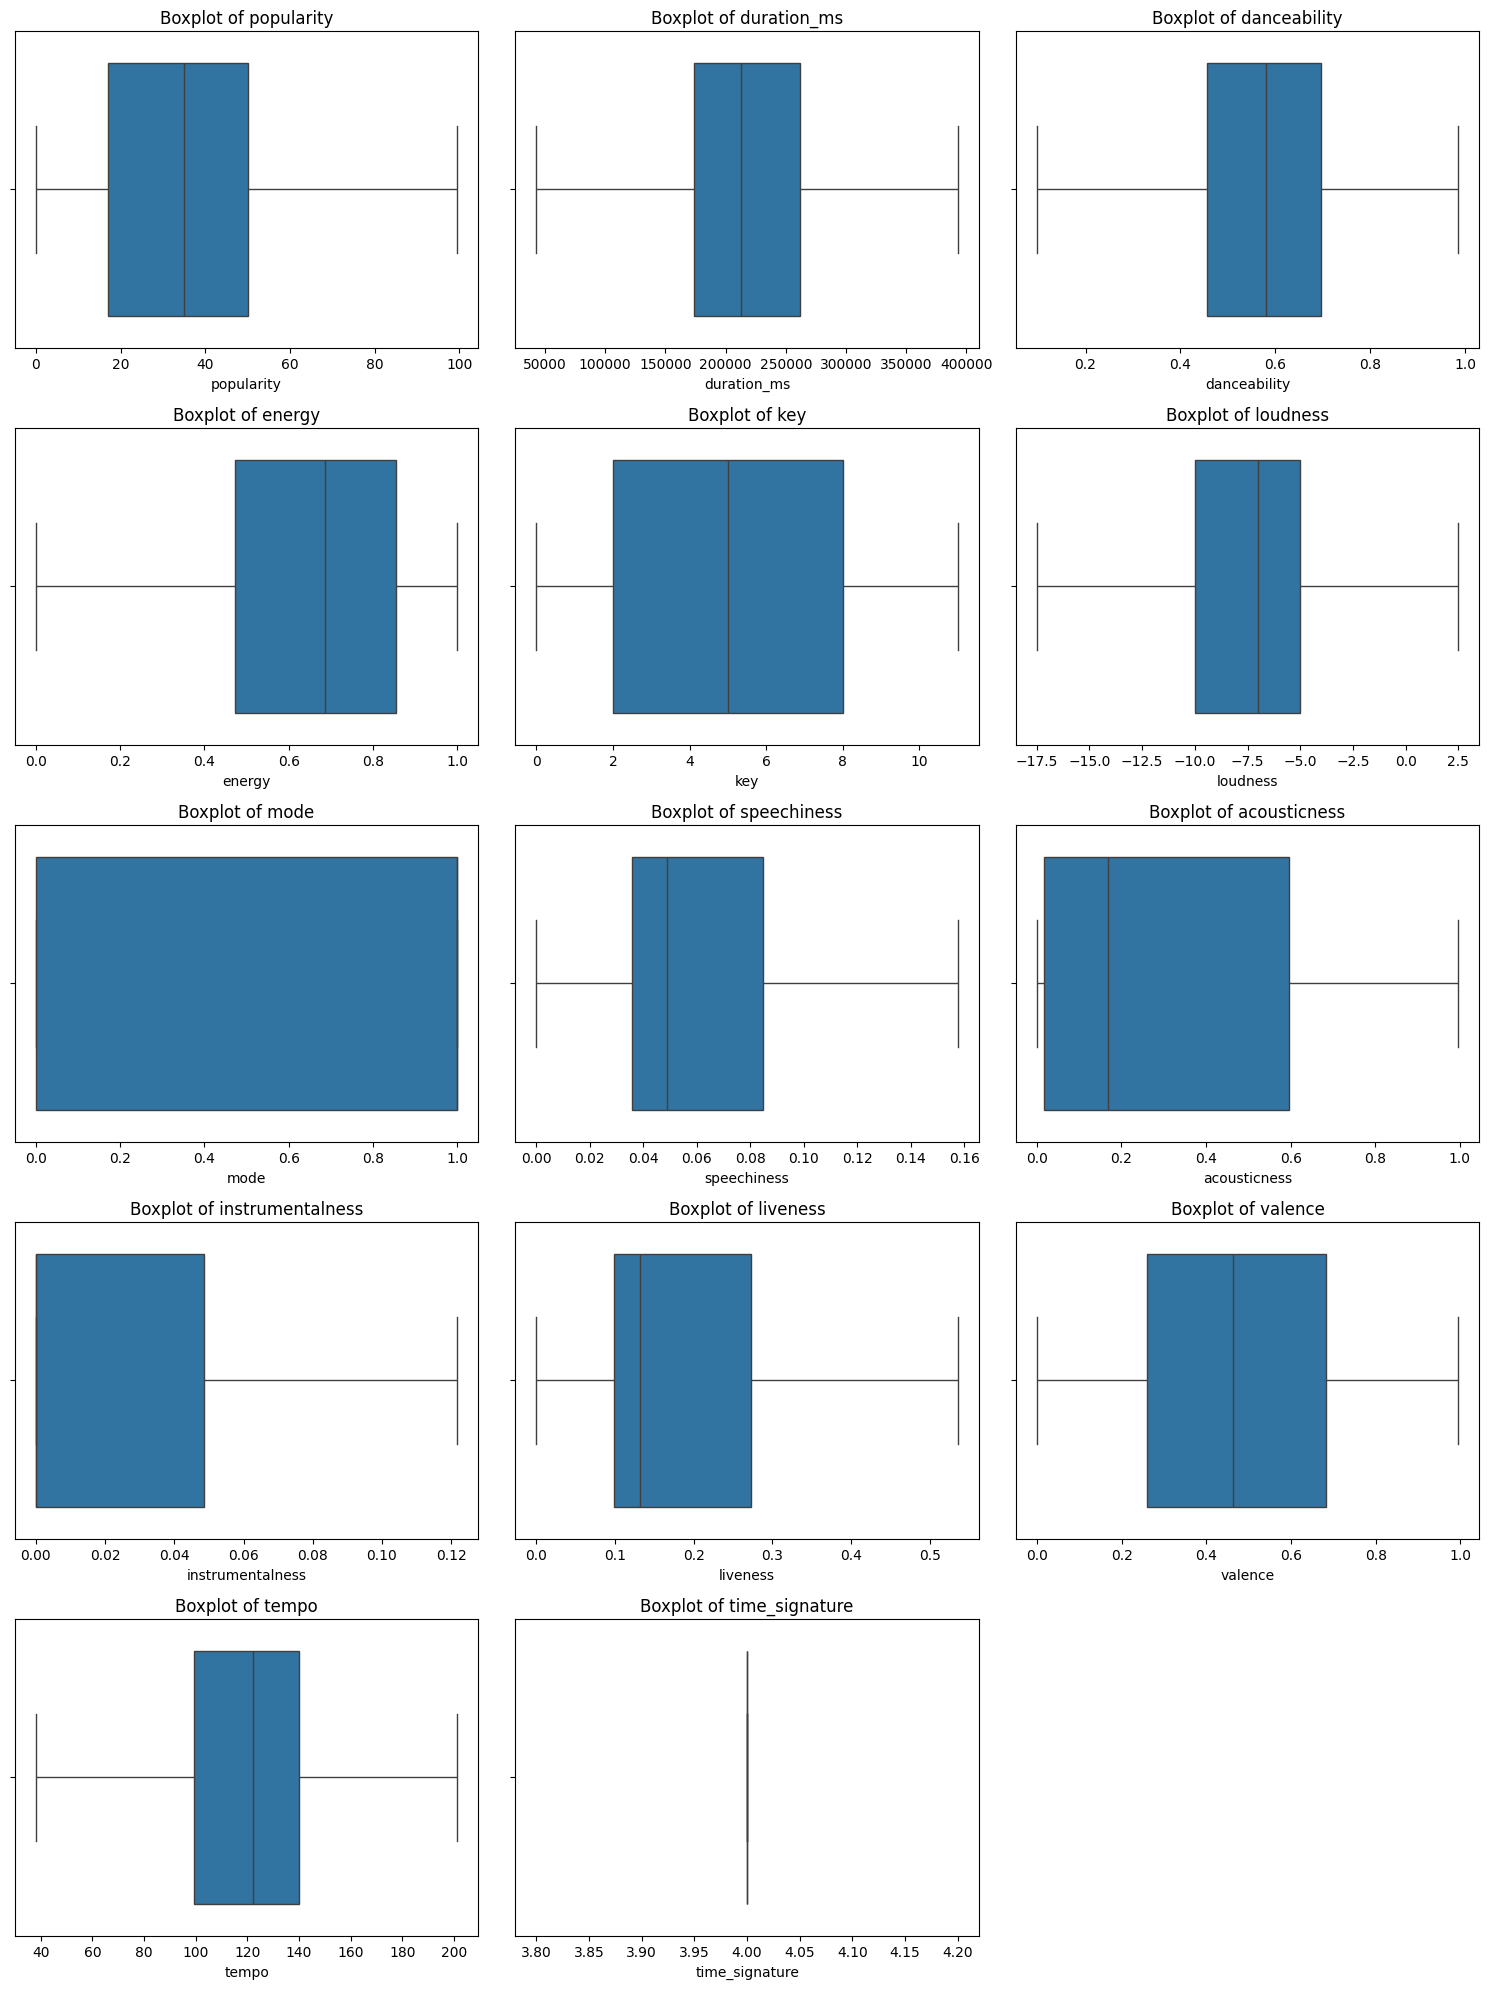

In [ ]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False)

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

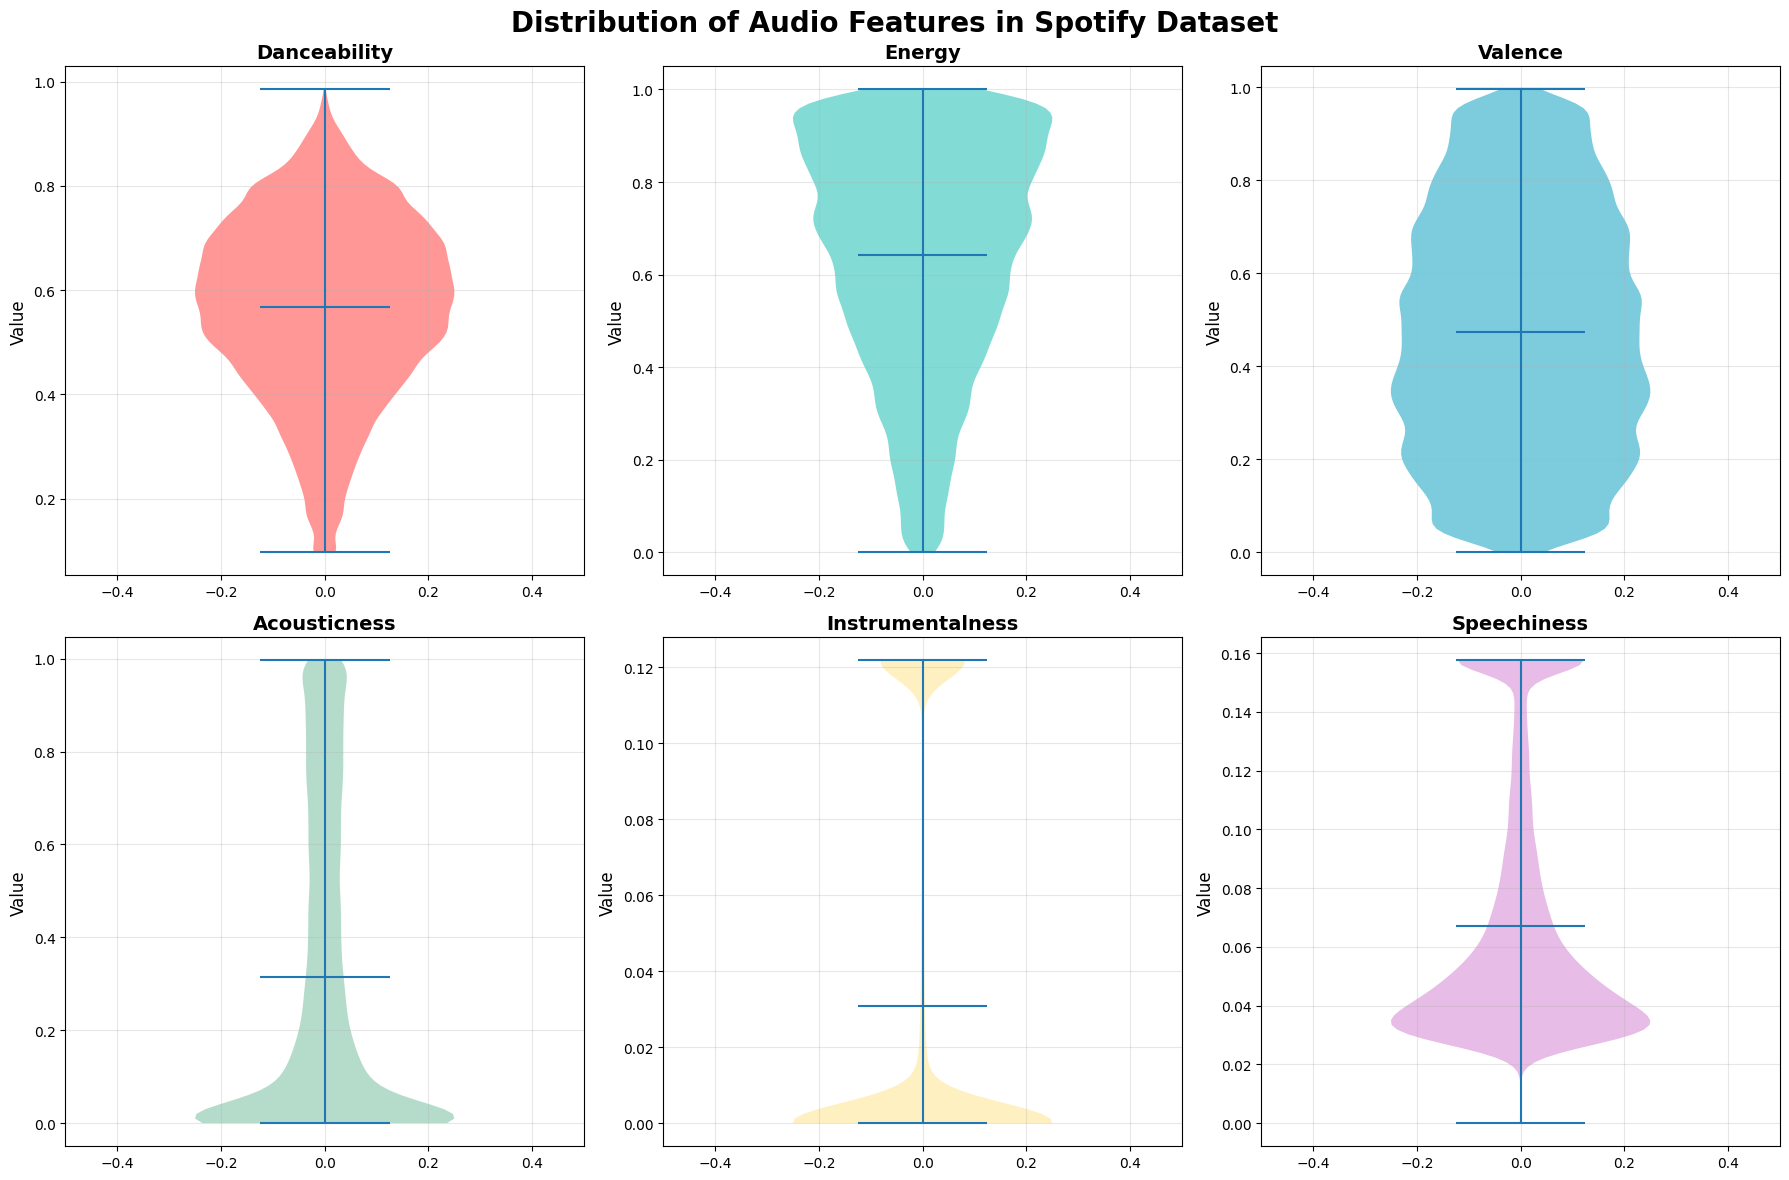

In [ ]:
#EXPLANATORY ANALYSIS
# Create a violin plot for key audio features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution of Audio Features in Spotify Dataset', fontsize=20, fontweight='bold')

features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'speechiness']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3

    # Create violin plot
    parts = axes[row, col].violinplot(df[feature].dropna(), positions=[0], showmeans=True)
    parts['bodies'][0].set_facecolor(colors[i])
    parts['bodies'][0].set_alpha(0.7)

    axes[row, col].set_title(feature.title(), fontsize=14, fontweight='bold')
    axes[row, col].set_ylabel('Value', fontsize=12)
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].set_xlim(-0.5, 0.5)

plt.tight_layout()
plt.show()

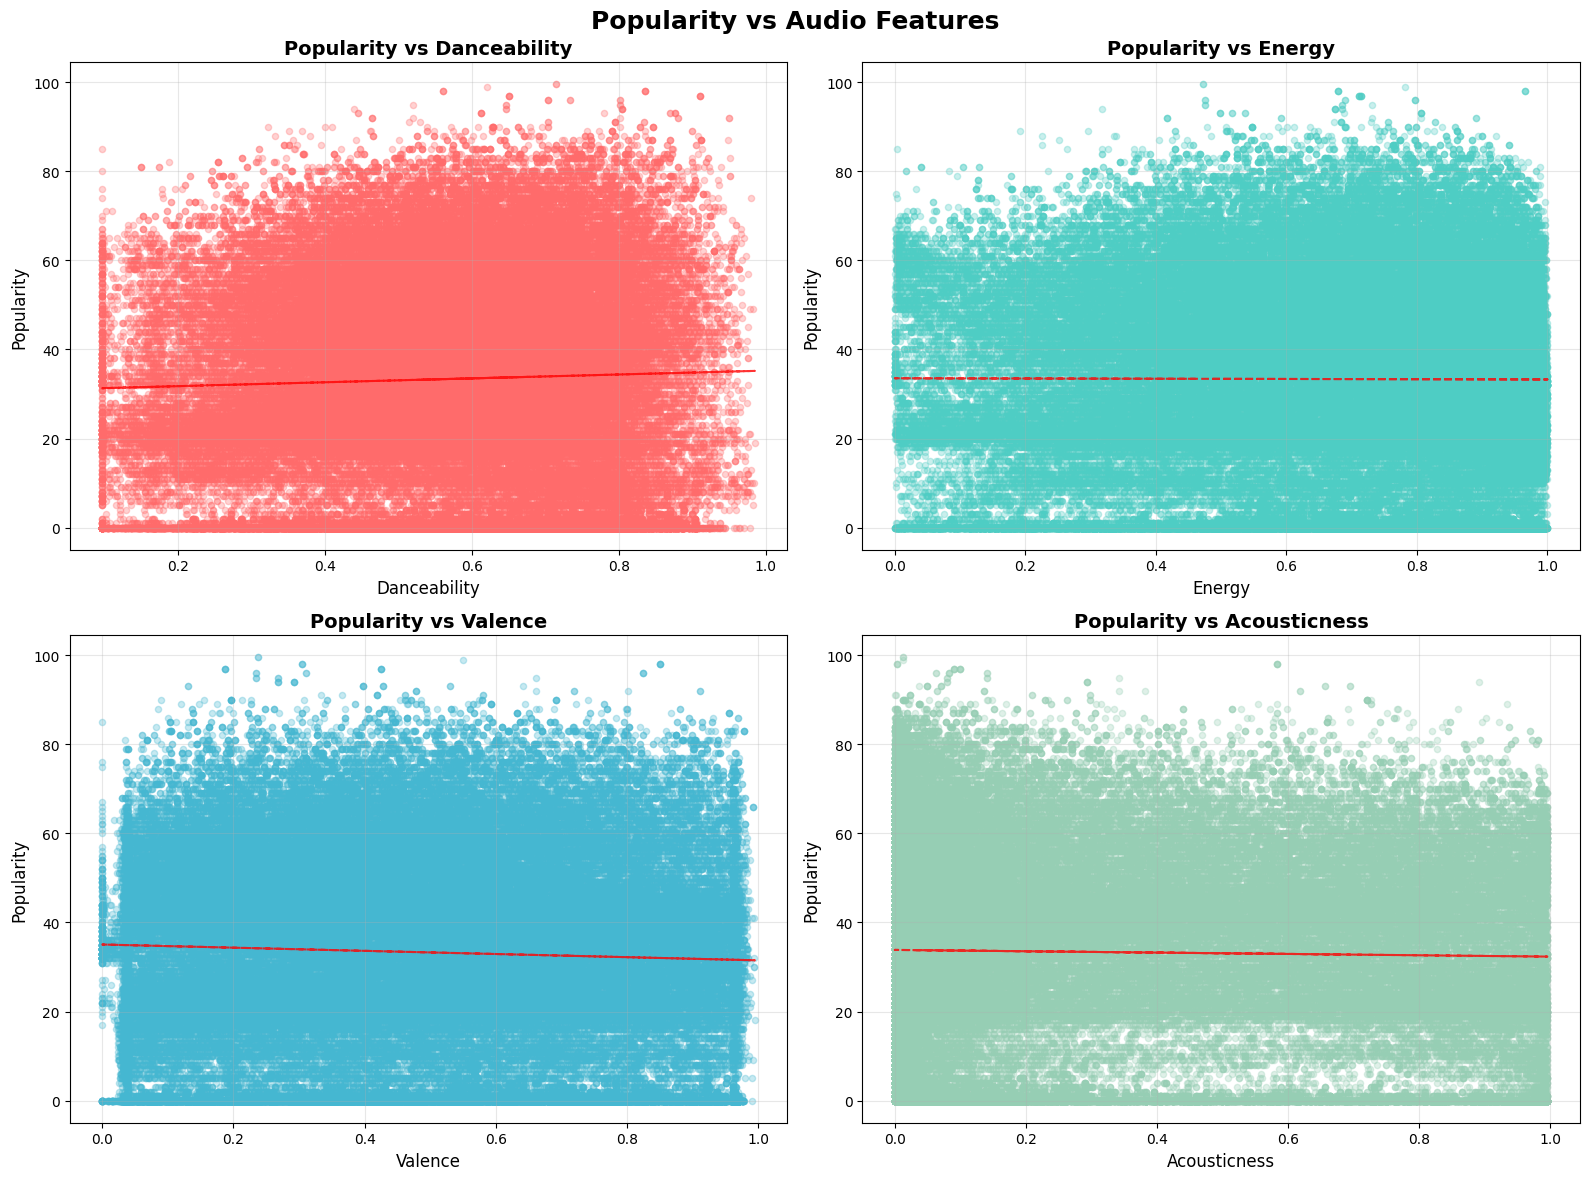

In [ ]:
# Create scatter plots showing popularity vs audio features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Popularity vs Audio Features', fontsize=18, fontweight='bold')

features = ['danceability', 'energy', 'valence', 'acousticness']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2

    # Create scatter plot with alpha for density
    axes[row, col].scatter(df[feature], df['popularity'], alpha=0.3, c=colors[i], s=20)
    axes[row, col].set_xlabel(feature.title(), fontsize=12)
    axes[row, col].set_ylabel('Popularity', fontsize=12)
    axes[row, col].set_title(f'Popularity vs {feature.title()}', fontsize=14, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3)

    # Add trend line
    z = np.polyfit(df[feature].dropna(), df['popularity'][df[feature].notna()], 1)
    p = np.poly1d(z)
    axes[row, col].plot(df[feature].dropna(), p(df[feature].dropna()), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

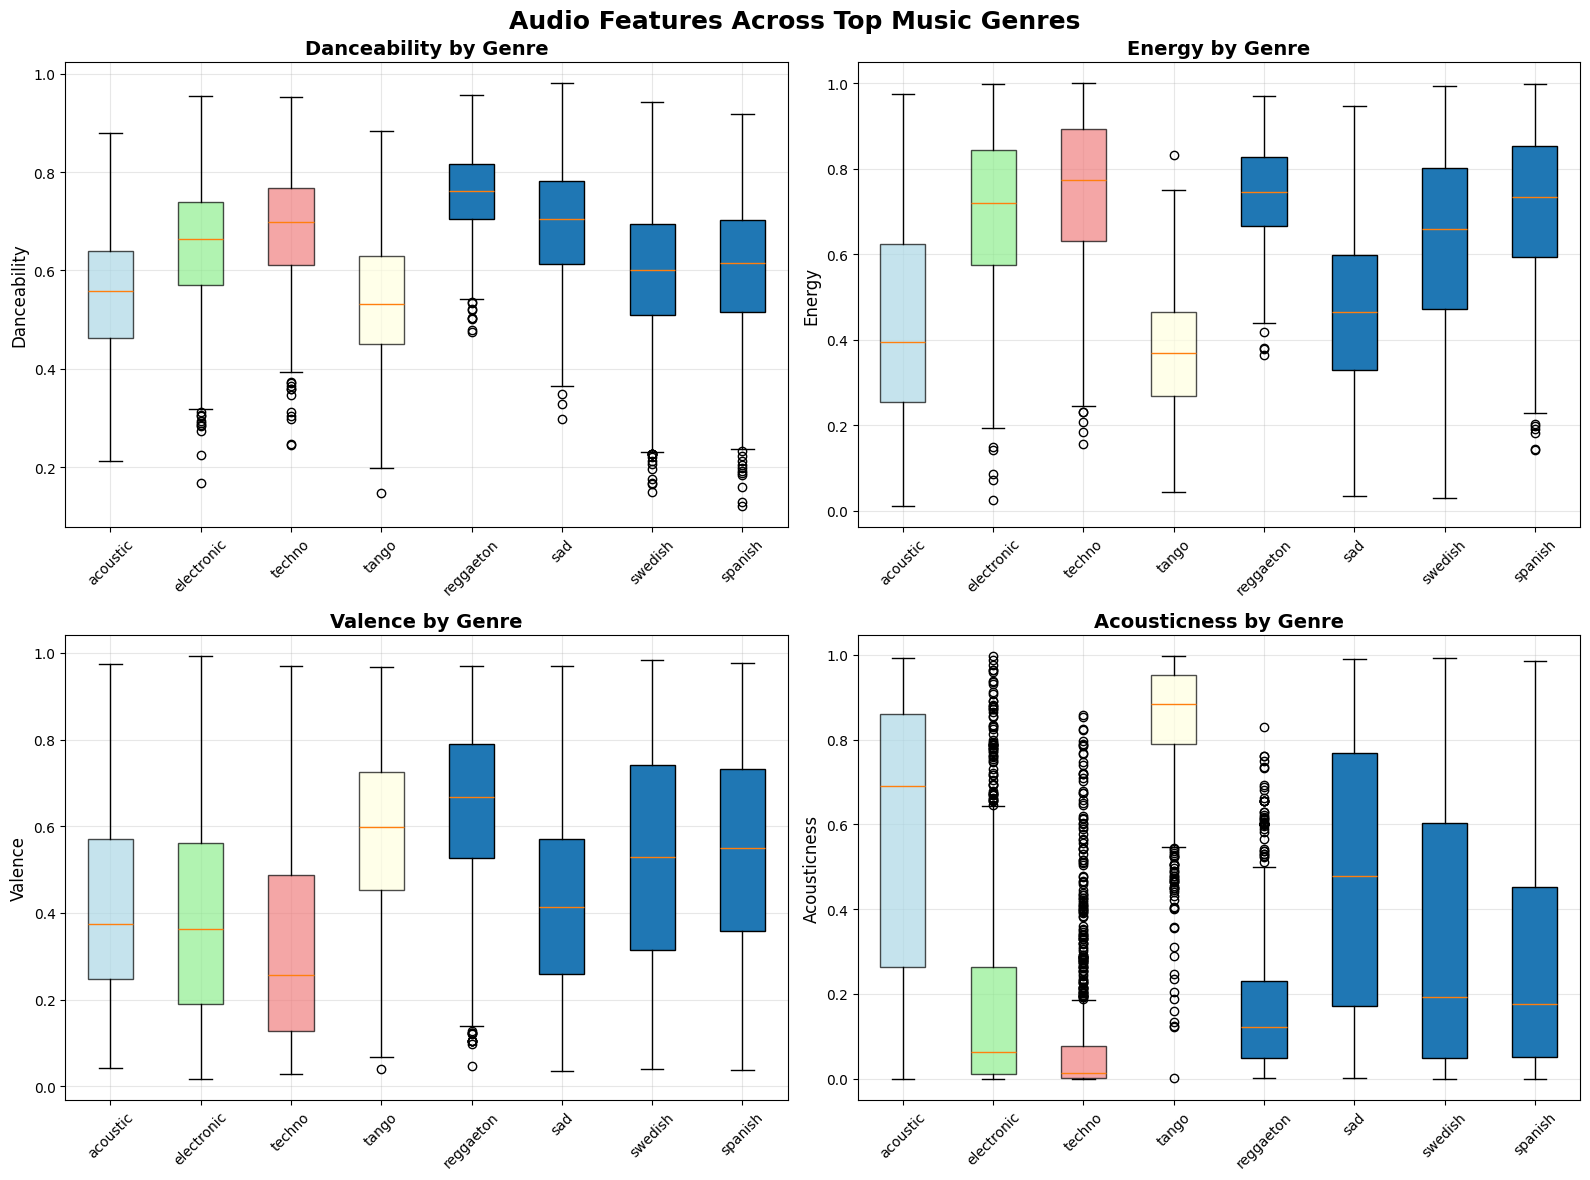

In [ ]:
# Box plot comparing audio features across top genres
top_genres = df['track_genre'].value_counts().head(8).index
genre_data = df[df['track_genre'].isin(top_genres)]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Audio Features Across Top Music Genres', fontsize=18, fontweight='bold')

features = ['danceability', 'energy', 'valence', 'acousticness']
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2

    box_data = [genre_data[genre_data['track_genre'] == genre][feature].dropna() for genre in top_genres]
    bp = axes[row, col].boxplot(box_data, labels=top_genres, patch_artist=True)

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    axes[row, col].set_title(f'{feature.title()} by Genre', fontsize=14, fontweight='bold')
    axes[row, col].set_ylabel(feature.title(), fontsize=12)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

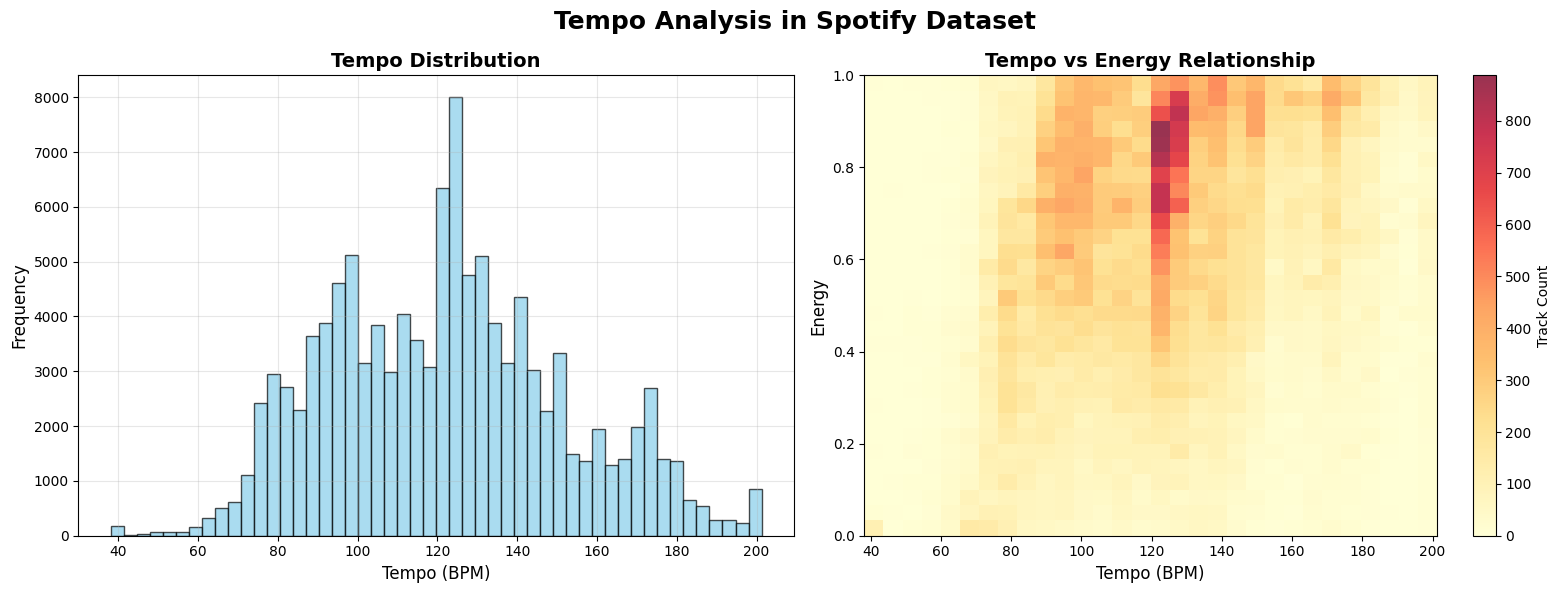

In [ ]:
# Create a 2D histogram showing tempo vs energy relationship
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Tempo Analysis in Spotify Dataset', fontsize=18, fontweight='bold')

# Tempo distribution histogram
ax1.hist(df['tempo'].dropna(), bins=50, color='skyblue', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Tempo (BPM)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Tempo Distribution', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2D histogram for tempo vs energy
h = ax2.hist2d(df['tempo'].dropna(), df[df['tempo'].notna()]['energy'],
               bins=30, cmap='YlOrRd', alpha=0.8)
ax2.set_xlabel('Tempo (BPM)', fontsize=12)
ax2.set_ylabel('Energy', fontsize=12)
ax2.set_title('Tempo vs Energy Relationship', fontsize=14, fontweight='bold')
plt.colorbar(h[3], ax=ax2, label='Track Count')

plt.tight_layout()
plt.show()

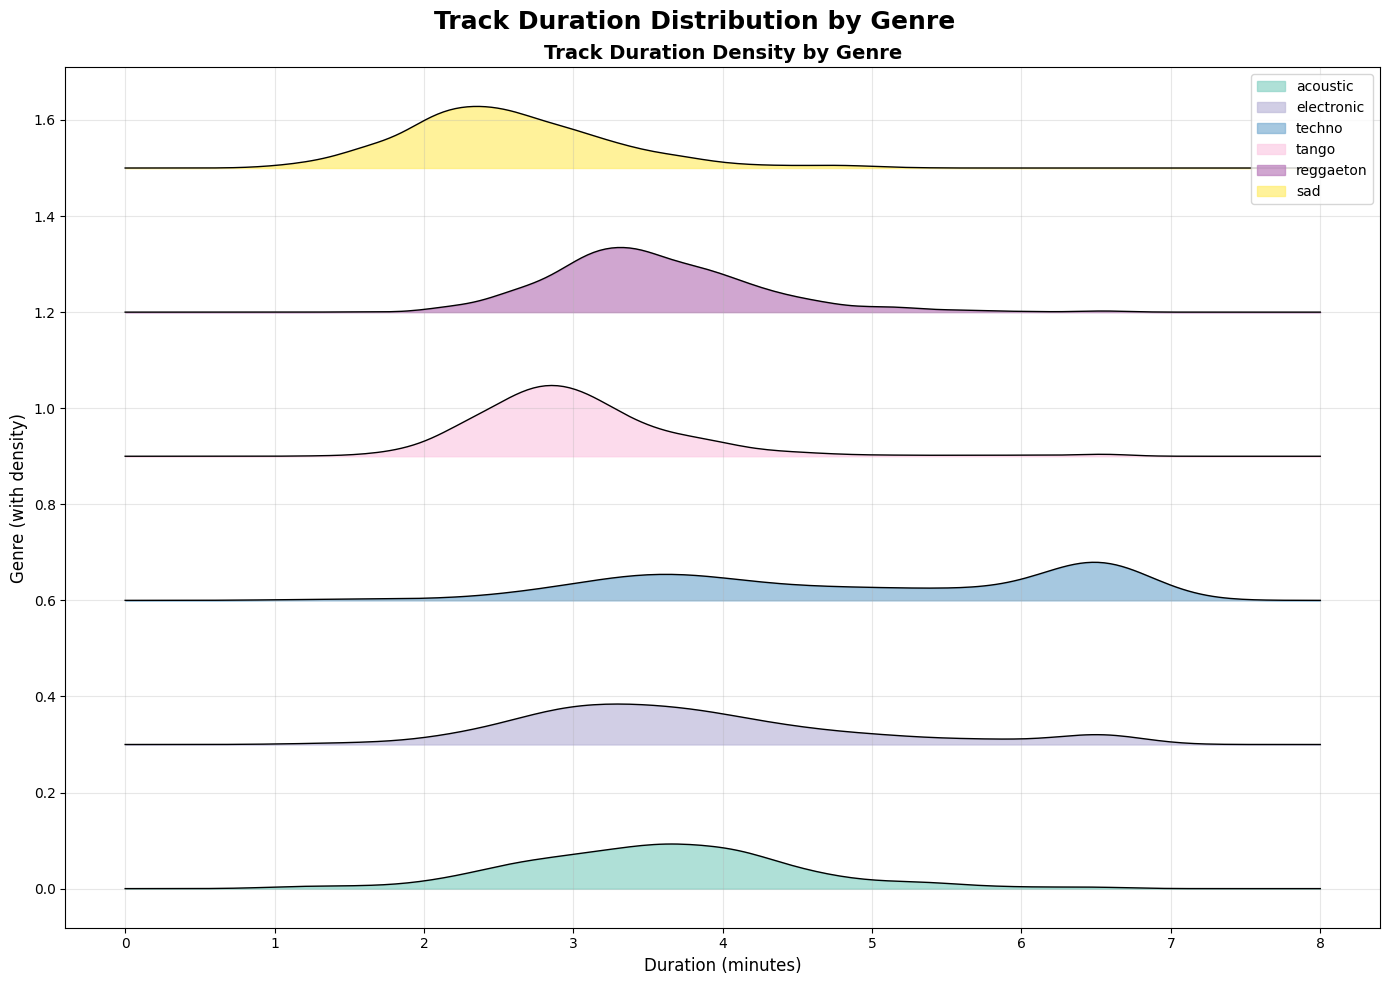

In [ ]:
# Create a ridge plot style visualization for duration by genre
top_genres = df['track_genre'].value_counts().head(6).index
colors = plt.cm.Set3(np.linspace(0, 1, len(top_genres)))

fig, ax = plt.subplots(figsize=(14, 10))
fig.suptitle('Track Duration Distribution by Genre', fontsize=18, fontweight='bold')

for i, genre in enumerate(top_genres):
    genre_data = df[df['track_genre'] == genre]['duration_ms'].dropna() / 1000 / 60  # Convert to minutes

    # Create density plot
    density = stats.gaussian_kde(genre_data)
    x_range = np.linspace(0, 8, 200)
    density_values = density(x_range)

    # Offset each genre
    offset = i * 0.3
    ax.fill_between(x_range, offset, offset + density_values * 0.2,
                   alpha=0.7, color=colors[i], label=genre)
    ax.plot(x_range, offset + density_values * 0.2, color='black', linewidth=1)

ax.set_xlabel('Duration (minutes)', fontsize=12)
ax.set_ylabel('Genre (with density)', fontsize=12)
ax.set_title('Track Duration Density by Genre', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

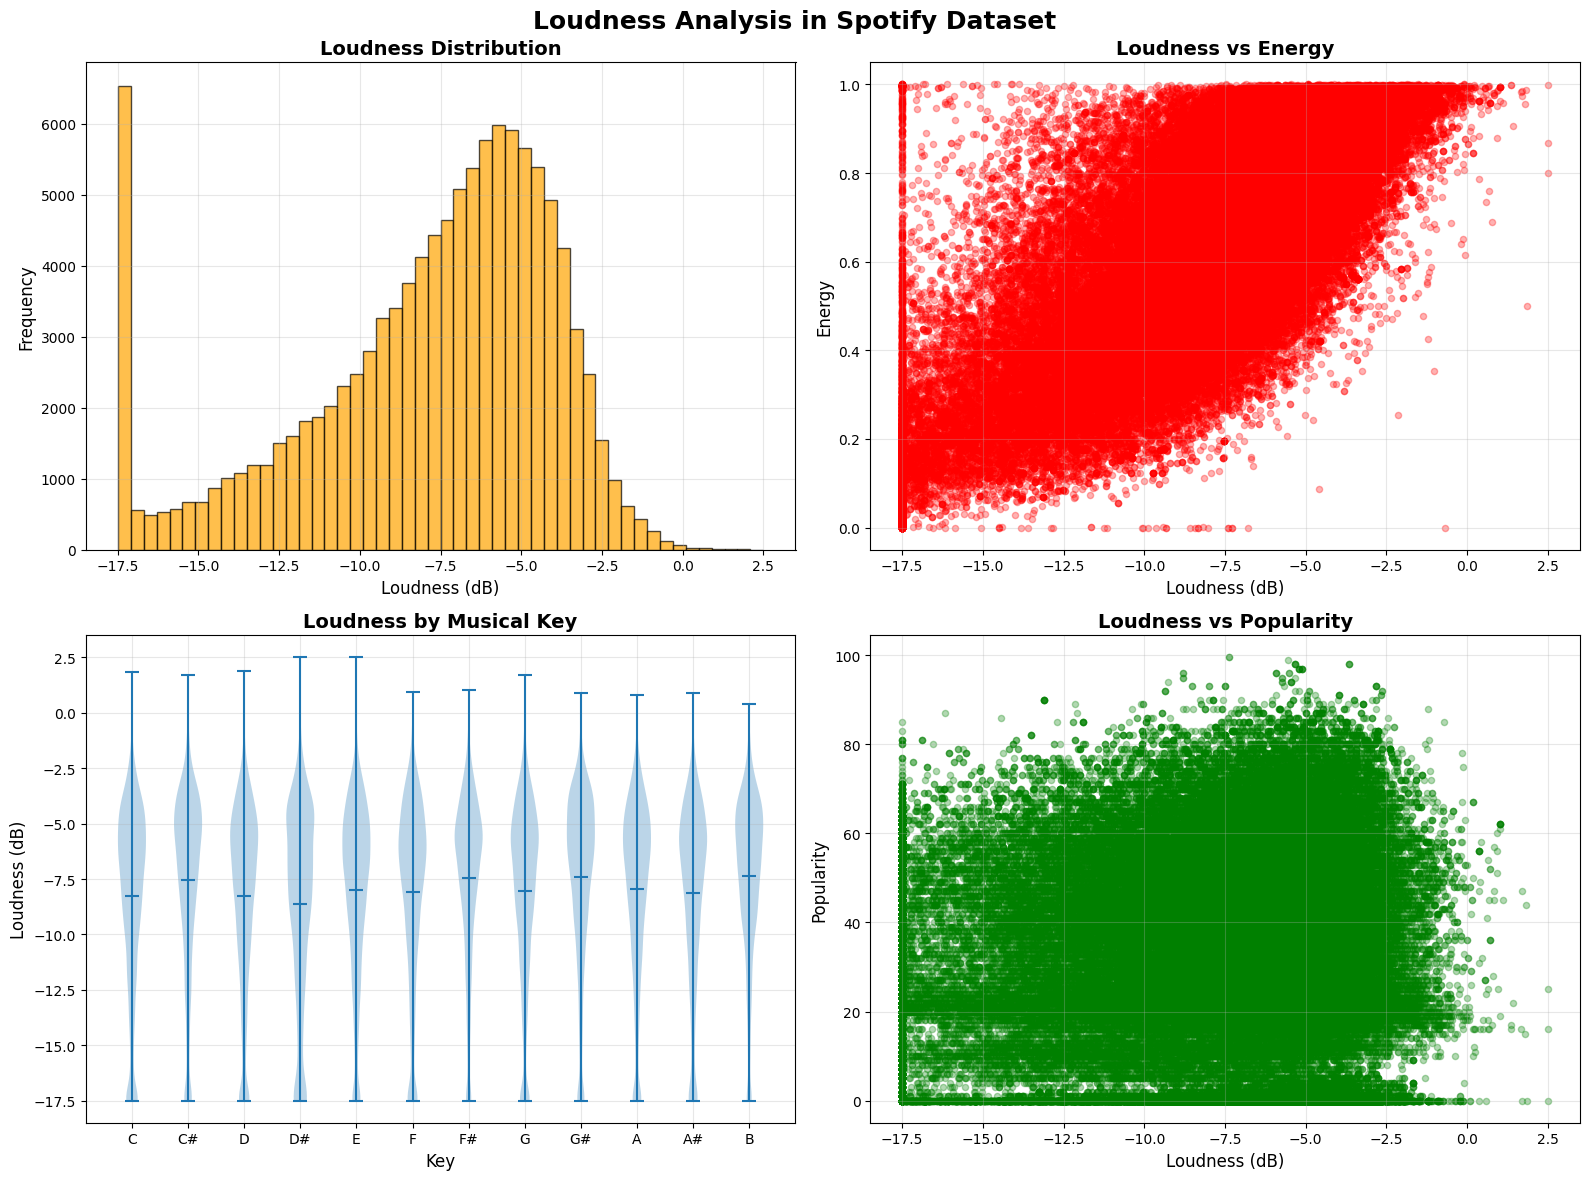

In [ ]:
# Create a combined visualization for loudness analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Loudness Analysis in Spotify Dataset', fontsize=18, fontweight='bold')

# Loudness histogram
axes[0, 0].hist(df['loudness'].dropna(), bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Loudness (dB)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Loudness Distribution', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Loudness vs Energy scatter
axes[0, 1].scatter(df['loudness'], df['energy'], alpha=0.3, c='red', s=20)
axes[0, 1].set_xlabel('Loudness (dB)', fontsize=12)
axes[0, 1].set_ylabel('Energy', fontsize=12)
axes[0, 1].set_title('Loudness vs Energy', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Loudness by key (violin plot)
key_labels = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
loudness_by_key = [df[df['key'] == i]['loudness'].dropna() for i in range(12)]
parts = axes[1, 0].violinplot(loudness_by_key, positions=range(12), showmeans=True)
axes[1, 0].set_xlabel('Key', fontsize=12)
axes[1, 0].set_ylabel('Loudness (dB)', fontsize=12)
axes[1, 0].set_title('Loudness by Musical Key', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(range(12))
axes[1, 0].set_xticklabels(key_labels)
axes[1, 0].grid(True, alpha=0.3)

# Loudness vs Popularity
axes[1, 1].scatter(df['loudness'], df['popularity'], alpha=0.3, c='green', s=20)
axes[1, 1].set_xlabel('Loudness (dB)', fontsize=12)
axes[1, 1].set_ylabel('Popularity', fontsize=12)
axes[1, 1].set_title('Loudness vs Popularity', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

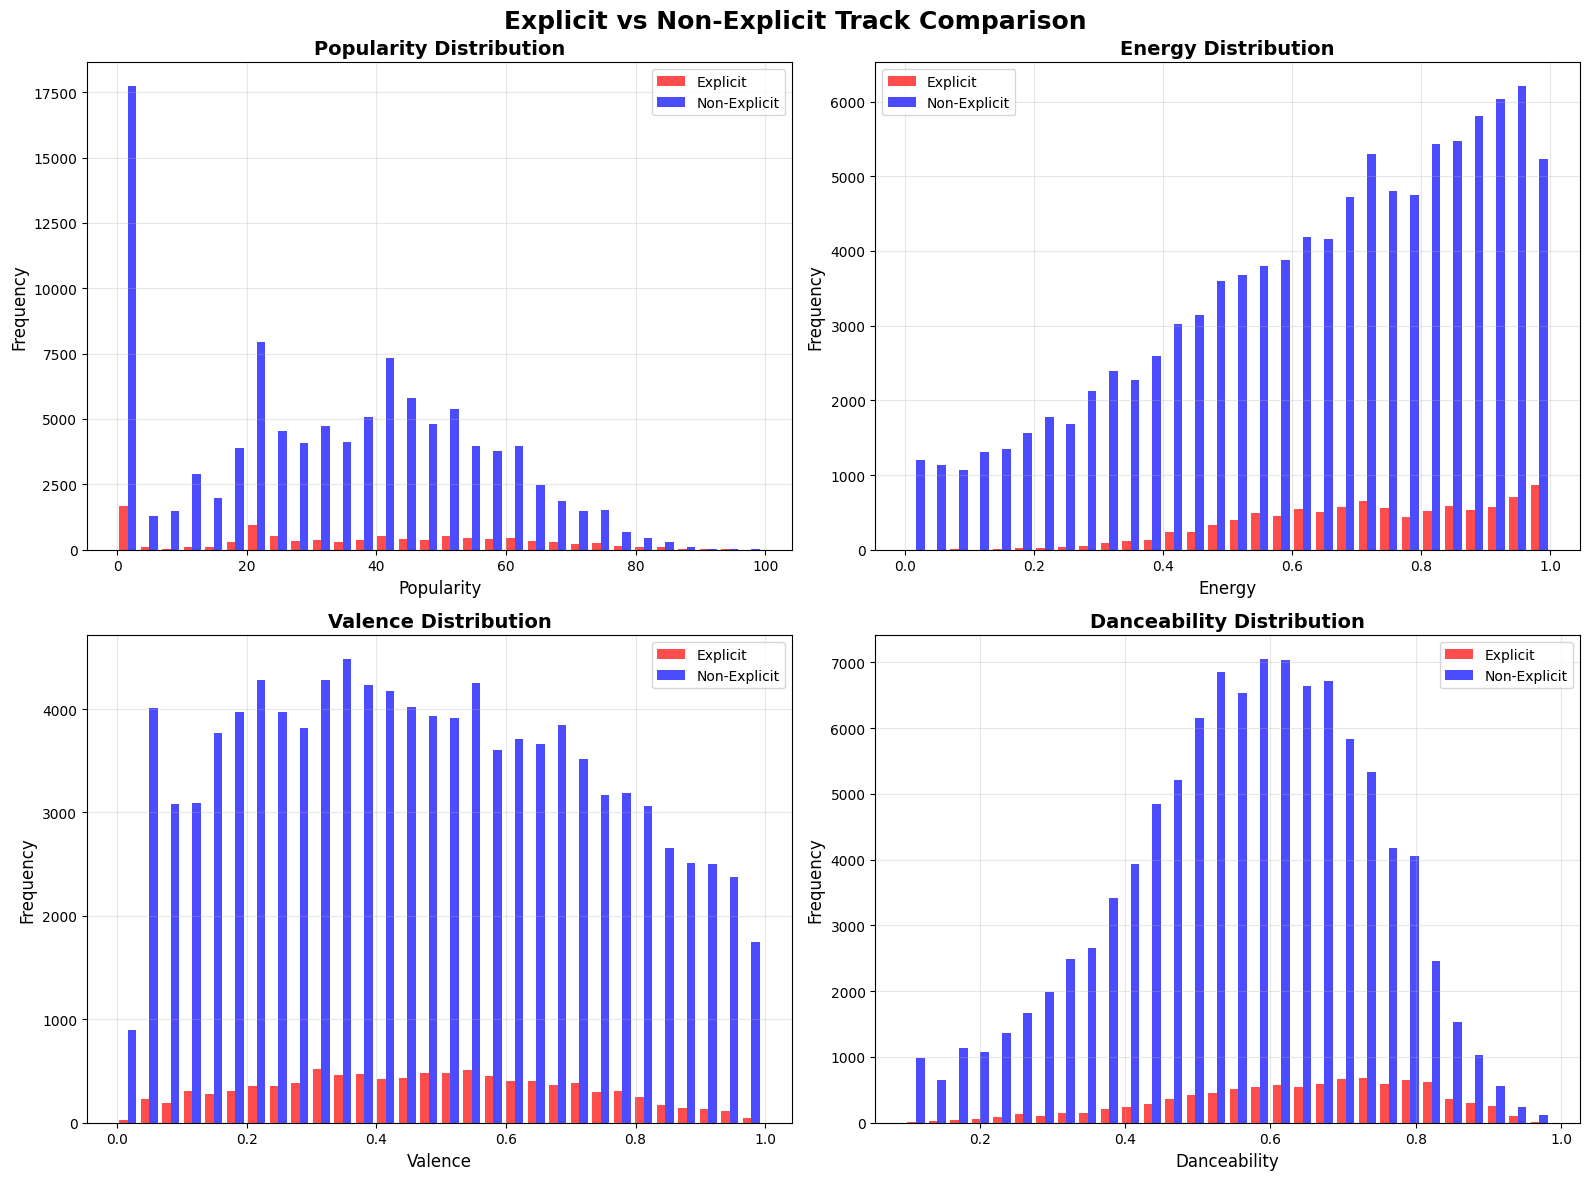

In [ ]:
# Compare explicit vs non-explicit tracks across multiple dimensions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Explicit vs Non-Explicit Track Comparison', fontsize=18, fontweight='bold')

explicit_data = df[df['explicit'] == True]
non_explicit_data = df[df['explicit'] == False]

# Popularity comparison
axes[0, 0].hist([explicit_data['popularity'].dropna(), non_explicit_data['popularity'].dropna()],
               bins=30, alpha=0.7, label=['Explicit', 'Non-Explicit'], color=['red', 'blue'])
axes[0, 0].set_xlabel('Popularity', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Popularity Distribution', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Energy comparison
axes[0, 1].hist([explicit_data['energy'].dropna(), non_explicit_data['energy'].dropna()],
               bins=30, alpha=0.7, label=['Explicit', 'Non-Explicit'], color=['red', 'blue'])
axes[0, 1].set_xlabel('Energy', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Energy Distribution', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Valence comparison
axes[1, 0].hist([explicit_data['valence'].dropna(), non_explicit_data['valence'].dropna()],
               bins=30, alpha=0.7, label=['Explicit', 'Non-Explicit'], color=['red', 'blue'])
axes[1, 0].set_xlabel('Valence', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Valence Distribution', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Danceability comparison
axes[1, 1].hist([explicit_data['danceability'].dropna(), non_explicit_data['danceability'].dropna()],
               bins=30, alpha=0.7, label=['Explicit', 'Non-Explicit'], color=['red', 'blue'])
axes[1, 1].set_xlabel('Danceability', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].set_title('Danceability Distribution', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

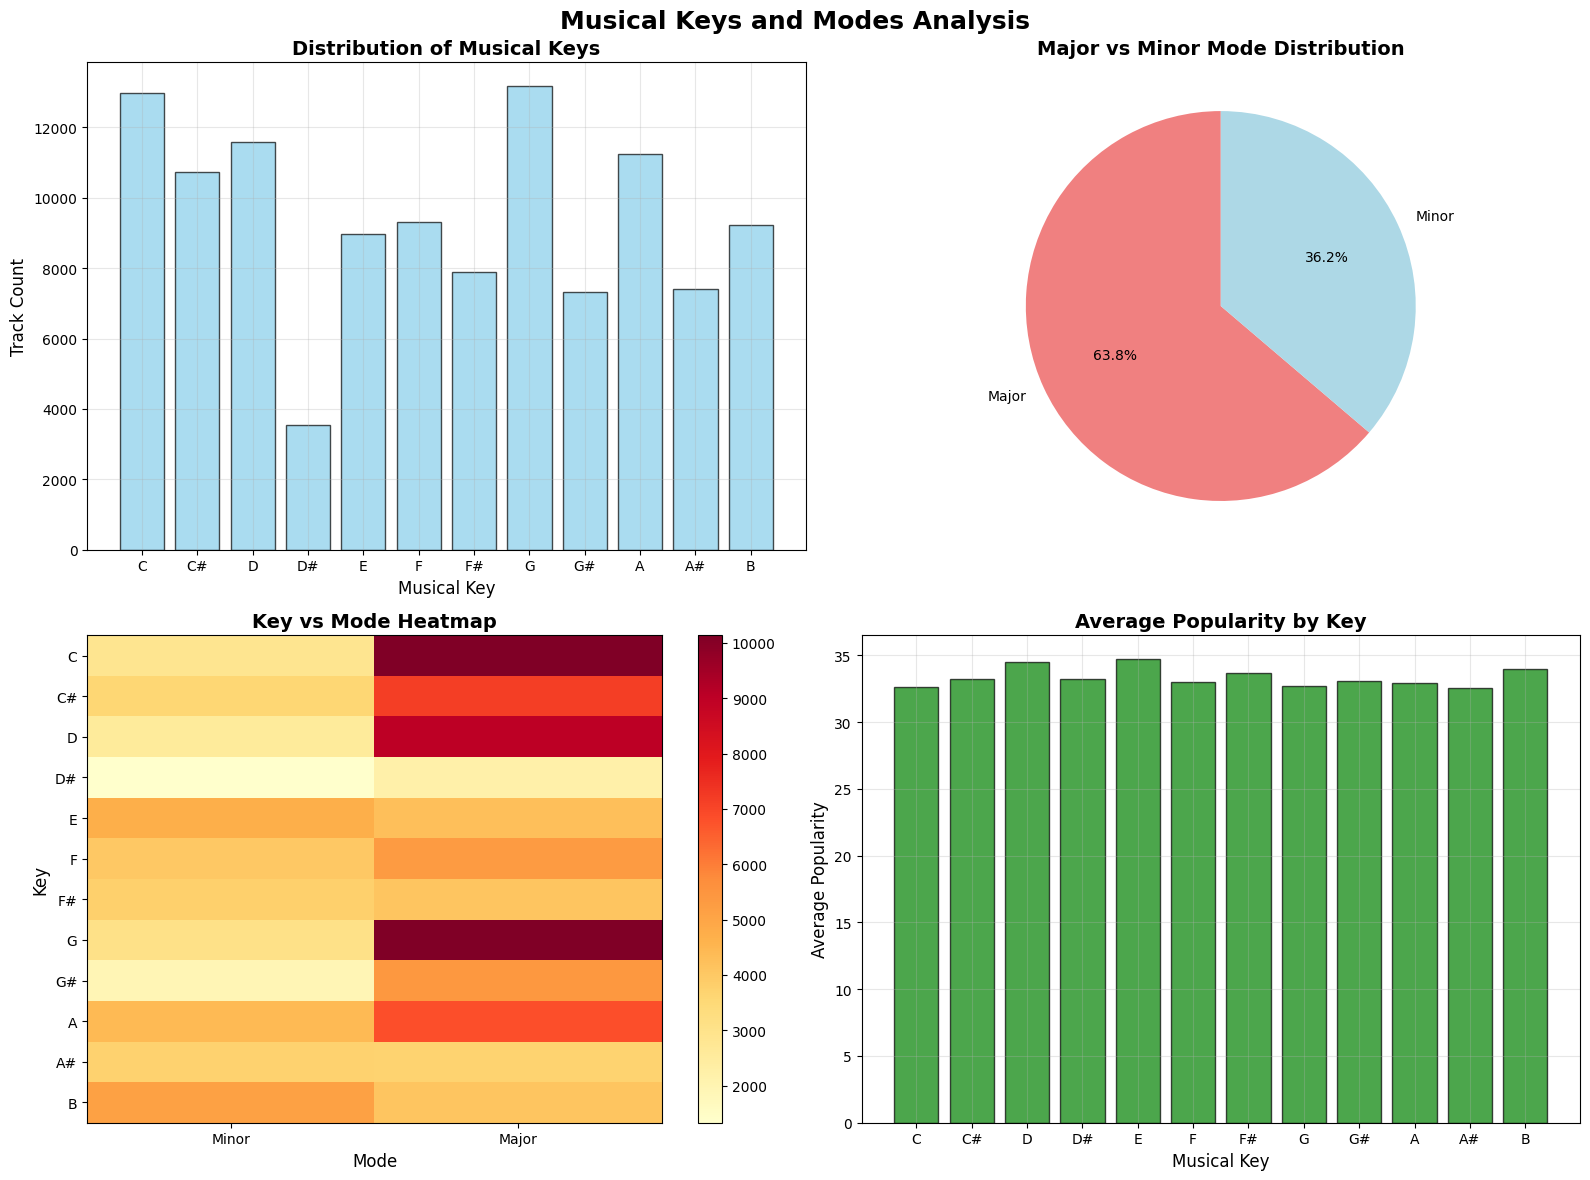

In [ ]:
# Create a comprehensive analysis of musical keys and modes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Musical Keys and Modes Analysis', fontsize=18, fontweight='bold')

key_labels = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# Key distribution
key_counts = df['key'].value_counts().sort_index()
axes[0, 0].bar(range(12), key_counts.values, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Musical Key', fontsize=12)
axes[0, 0].set_ylabel('Track Count', fontsize=12)
axes[0, 0].set_title('Distribution of Musical Keys', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(range(12))
axes[0, 0].set_xticklabels(key_labels)
axes[0, 0].grid(True, alpha=0.3)

# Mode distribution
mode_counts = df['mode'].value_counts()
axes[0, 1].pie(mode_counts.values, labels=['Major', 'Minor'], autopct='%1.1f%%',
               colors=['lightcoral', 'lightblue'], startangle=90)
axes[0, 1].set_title('Major vs Minor Mode Distribution', fontsize=14, fontweight='bold')

# Key vs Mode heatmap
key_mode_crosstab = pd.crosstab(df['key'], df['mode'])
im = axes[1, 0].imshow(key_mode_crosstab.values, cmap='YlOrRd', aspect='auto')
axes[1, 0].set_xlabel('Mode', fontsize=12)
axes[1, 0].set_ylabel('Key', fontsize=12)
axes[1, 0].set_title('Key vs Mode Heatmap', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['Minor', 'Major'])
axes[1, 0].set_yticks(range(12))
axes[1, 0].set_yticklabels(key_labels)
plt.colorbar(im, ax=axes[1, 0])

# Average popularity by key
avg_popularity_by_key = df.groupby('key')['popularity'].mean()
axes[1, 1].bar(range(12), avg_popularity_by_key.values, color='green', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Musical Key', fontsize=12)
axes[1, 1].set_ylabel('Average Popularity', fontsize=12)
axes[1, 1].set_title('Average Popularity by Key', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(range(12))
axes[1, 1].set_xticklabels(key_labels)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


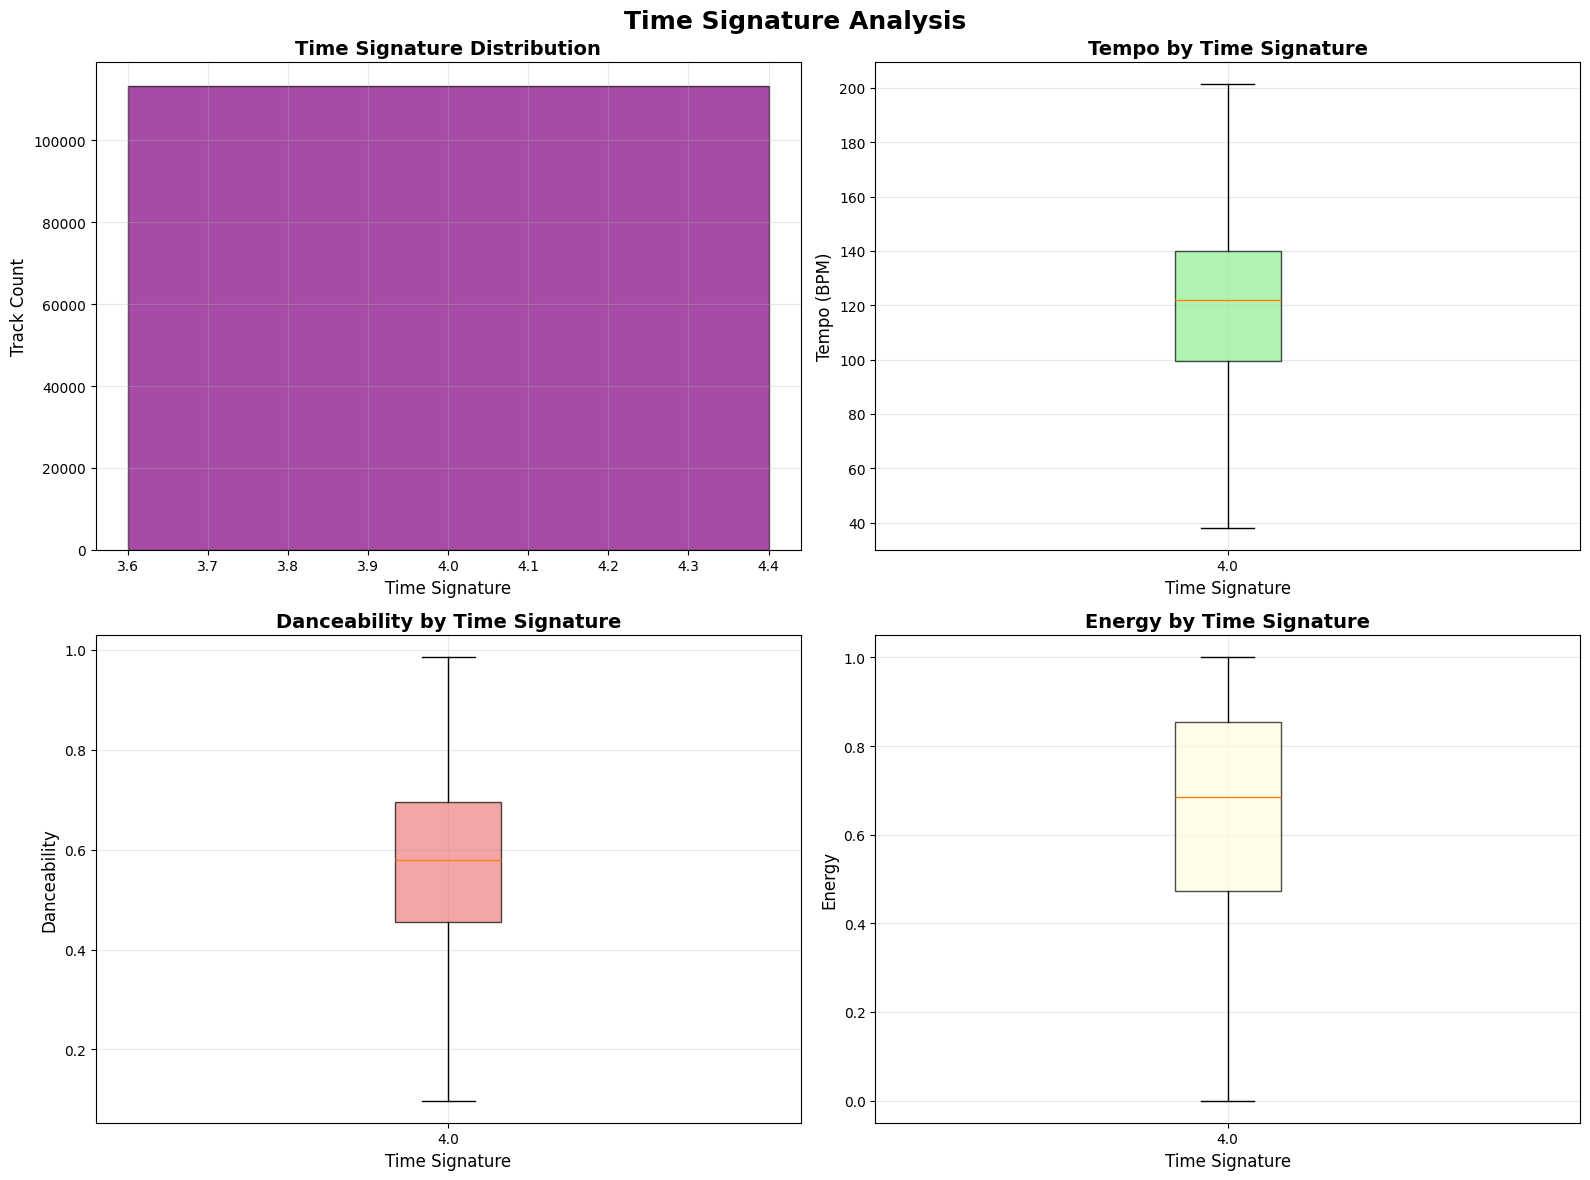

In [ ]:
# Analyze time signature patterns and their relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Time Signature Analysis', fontsize=18, fontweight='bold')

# Time signature distribution
time_sig_counts = df['time_signature'].value_counts().sort_index()
axes[0, 0].bar(time_sig_counts.index, time_sig_counts.values, color='purple', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Time Signature', fontsize=12)
axes[0, 0].set_ylabel('Track Count', fontsize=12)
axes[0, 0].set_title('Time Signature Distribution', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Tempo by time signature
time_sigs = df['time_signature'].unique()
time_sigs = time_sigs[~pd.isna(time_sigs)]
tempo_by_time_sig = [df[df['time_signature'] == ts]['tempo'].dropna() for ts in sorted(time_sigs)]
bp = axes[0, 1].boxplot(tempo_by_time_sig, labels=sorted(time_sigs), patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightgreen')
    patch.set_alpha(0.7)
axes[0, 1].set_xlabel('Time Signature', fontsize=12)
axes[0, 1].set_ylabel('Tempo (BPM)', fontsize=12)
axes[0, 1].set_title('Tempo by Time Signature', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Danceability by time signature
dance_by_time_sig = [df[df['time_signature'] == ts]['danceability'].dropna() for ts in sorted(time_sigs)]
bp2 = axes[1, 0].boxplot(dance_by_time_sig, labels=sorted(time_sigs), patch_artist=True)
for patch in bp2['boxes']:
    patch.set_facecolor('lightcoral')
    patch.set_alpha(0.7)
axes[1, 0].set_xlabel('Time Signature', fontsize=12)
axes[1, 0].set_ylabel('Danceability', fontsize=12)
axes[1, 0].set_title('Danceability by Time Signature', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Energy by time signature
energy_by_time_sig = [df[df['time_signature'] == ts]['energy'].dropna() for ts in sorted(time_sigs)]
bp3 = axes[1, 1].boxplot(energy_by_time_sig, labels=sorted(time_sigs), patch_artist=True)
for patch in bp3['boxes']:
    patch.set_facecolor('lightyellow')
    patch.set_alpha(0.7)
axes[1, 1].set_xlabel('Time Signature', fontsize=12)
axes[1, 1].set_ylabel('Energy', fontsize=12)
axes[1, 1].set_title('Energy by Time Signature', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

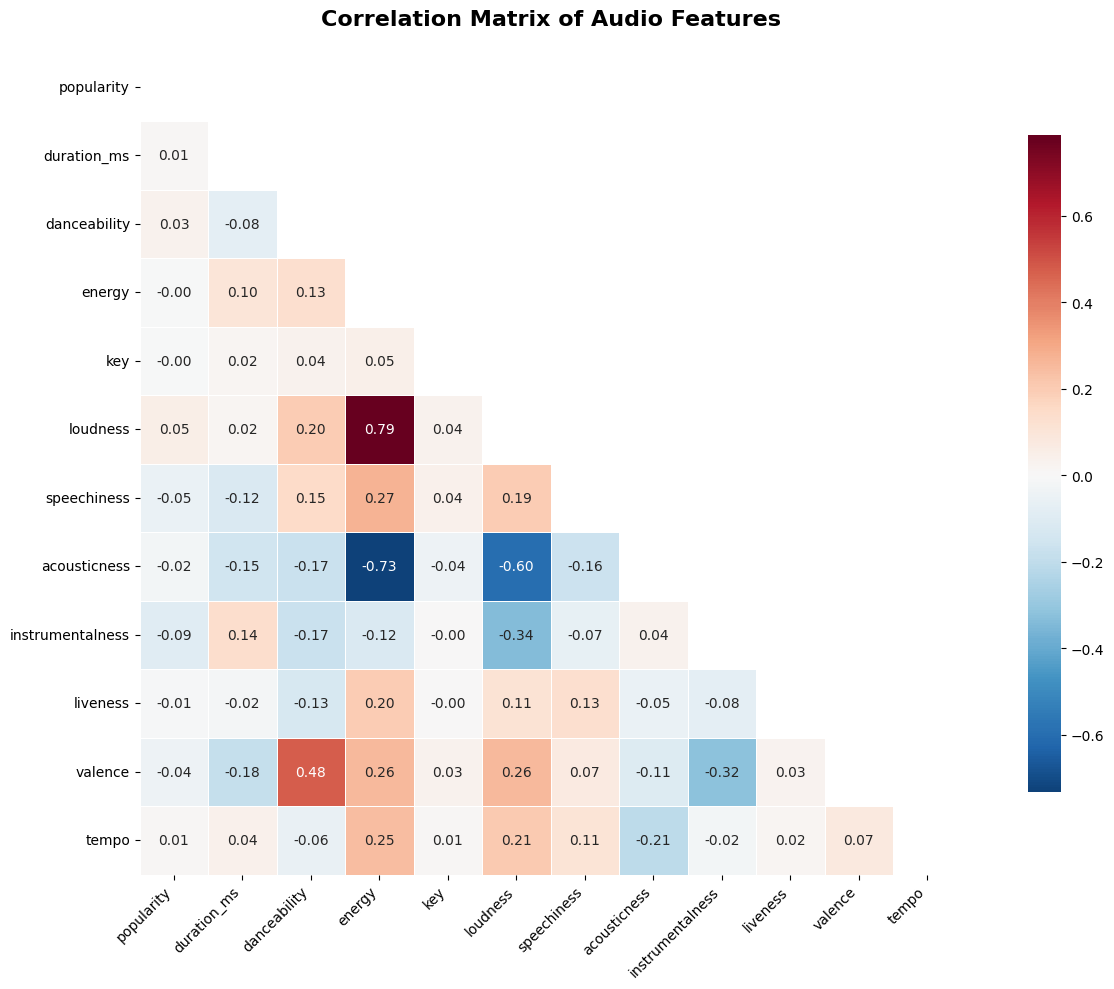

In [ ]:
# Create a comprehensive correlation heatmap
numerical_features = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, fmt='.2f')

ax.set_title('Correlation Matrix of Audio Features', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

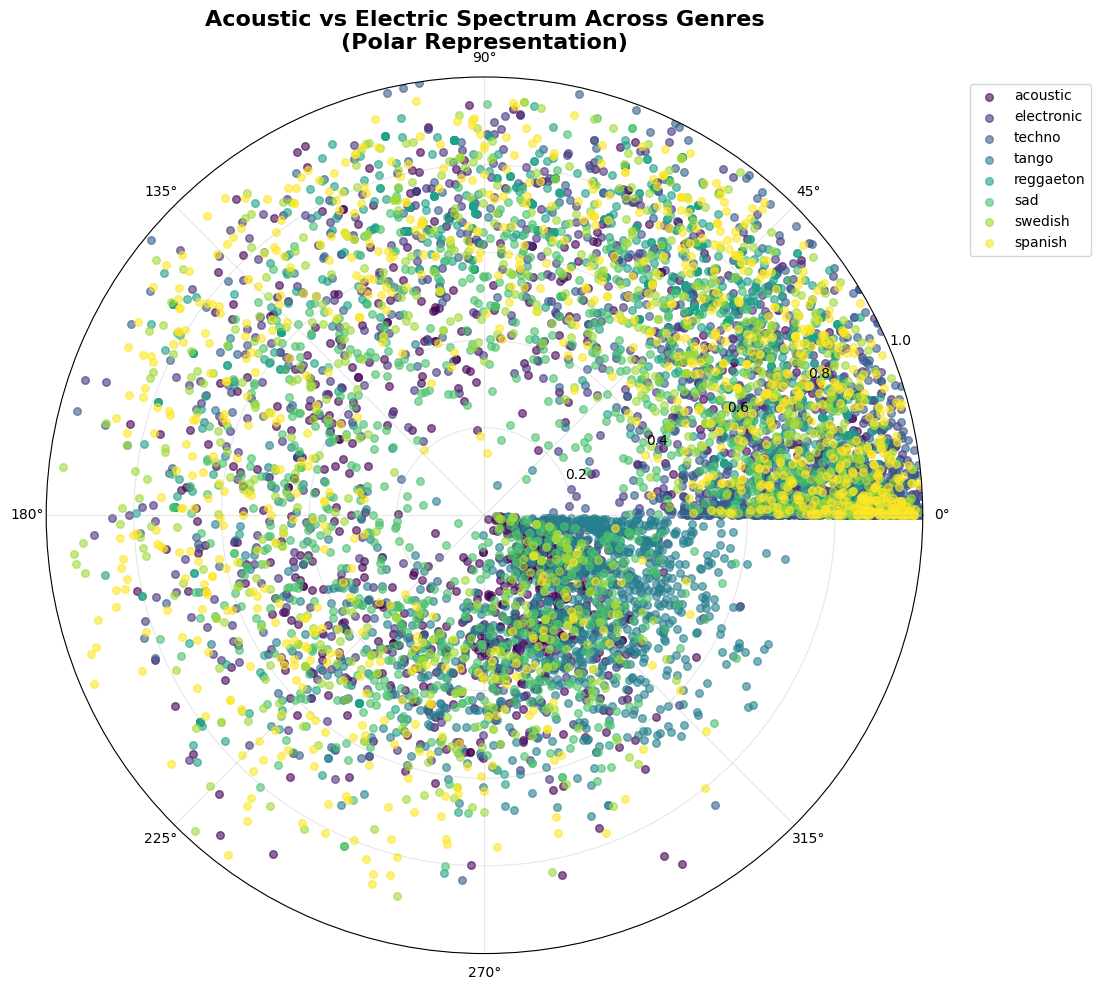

In [ ]:
# Create a polar plot showing acousticness vs energy by genre
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection='polar'))

top_genres = df['track_genre'].value_counts().head(8).index
colors = plt.cm.viridis(np.linspace(0, 1, len(top_genres)))

for i, genre in enumerate(top_genres):
    genre_data = df[df['track_genre'] == genre]

    # Create polar coordinates
    theta = genre_data['acousticness'] * 2 * np.pi  # Convert to radians
    r = genre_data['energy']

    ax.scatter(theta, r, alpha=0.6, s=30, c=[colors[i]], label=genre)

ax.set_title('Acoustic vs Electric Spectrum Across Genres\n(Polar Representation)',
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

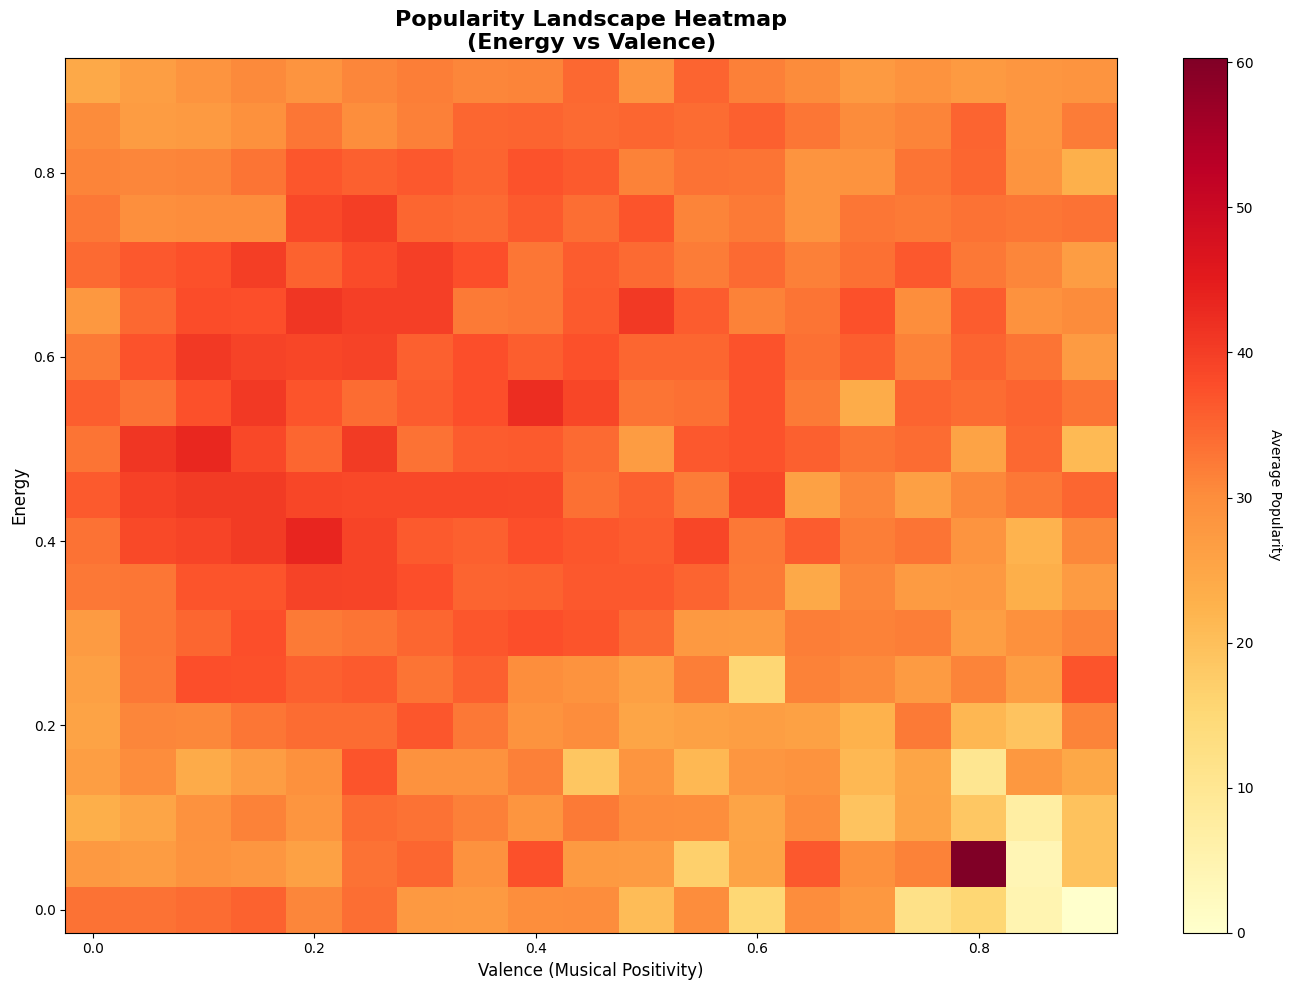

In [ ]:
# Create a 2D heatmap of popularity across energy and valence
fig, ax = plt.subplots(figsize=(14, 10))

# Create bins for energy and valence
energy_bins = np.linspace(0, 1, 20)
valence_bins = np.linspace(0, 1, 20)

# Calculate mean popularity for each bin
popularity_matrix = np.zeros((len(energy_bins)-1, len(valence_bins)-1))

for i in range(len(energy_bins)-1):
    for j in range(len(valence_bins)-1):
        mask = ((df['energy'] >= energy_bins[i]) & (df['energy'] < energy_bins[i+1]) &
                (df['valence'] >= valence_bins[j]) & (df['valence'] < valence_bins[j+1]))
        if mask.sum() > 0:
            popularity_matrix[i, j] = df[mask]['popularity'].mean()

# Create heatmap
im = ax.imshow(popularity_matrix, cmap='YlOrRd', aspect='auto', origin='lower')
ax.set_title('Popularity Landscape Heatmap\n(Energy vs Valence)', fontsize=16, fontweight='bold')
ax.set_xlabel('Valence (Musical Positivity)', fontsize=12)
ax.set_ylabel('Energy', fontsize=12)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Average Popularity', rotation=270, labelpad=20)

# Set tick labels
ax.set_xticks(range(0, 20, 4))
ax.set_xticklabels([f'{v:.1f}' for v in valence_bins[::4]])
ax.set_yticks(range(0, 20, 4))
ax.set_yticklabels([f'{v:.1f}' for v in energy_bins[::4]])

plt.tight_layout()
plt.show()


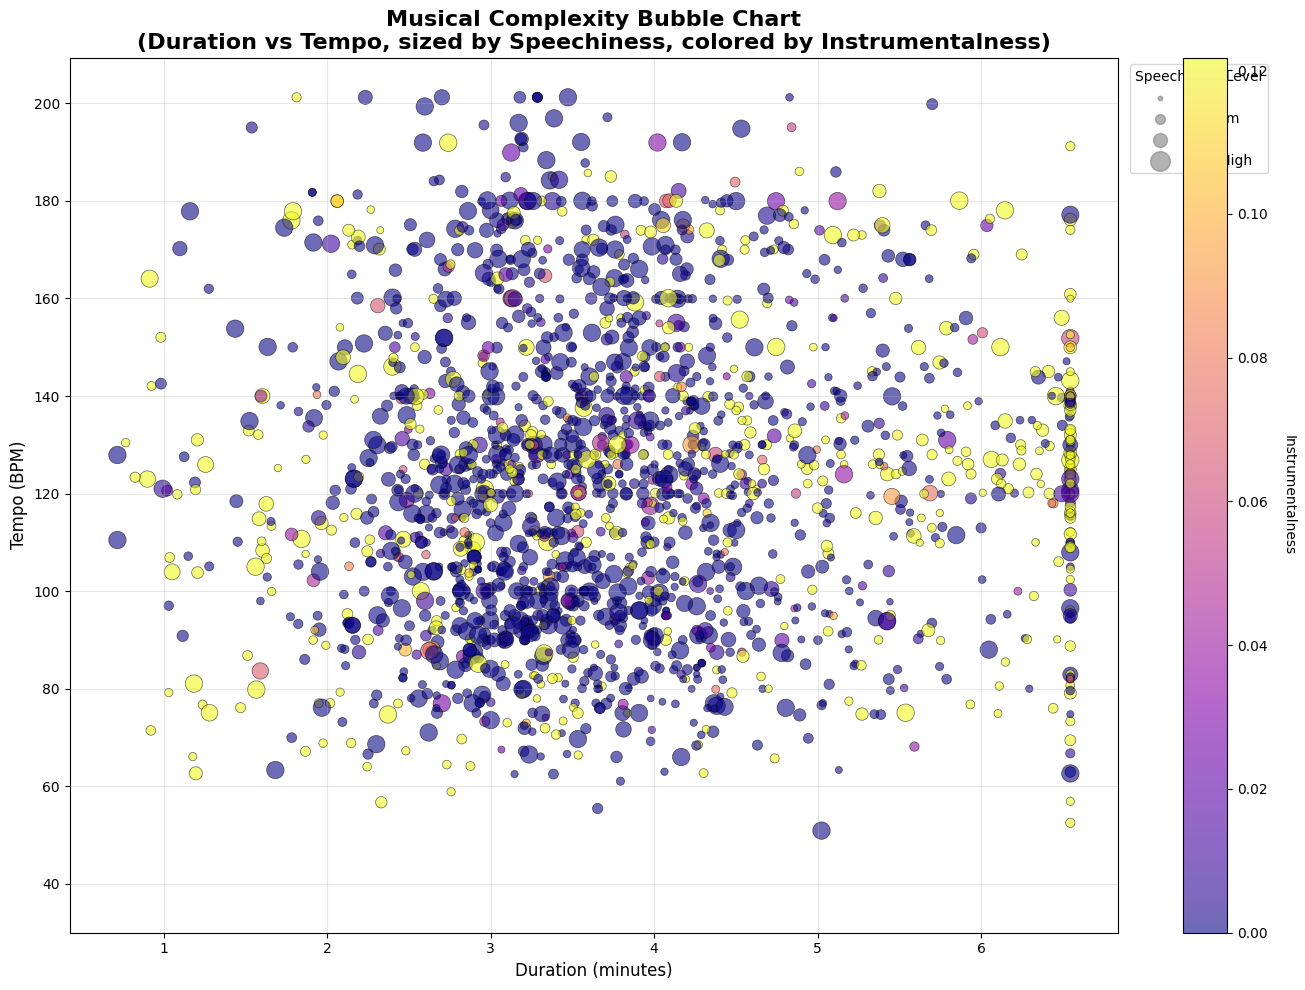

In [ ]:
# Create a bubble chart showing duration vs tempo with speechiness as bubble size
fig, ax = plt.subplots(figsize=(14, 10))

# Sample data to avoid overcrowding
sample_data = df.sample(n=2000, random_state=42)

# Create bubble chart
scatter = ax.scatter(sample_data['duration_ms']/1000/60, sample_data['tempo'],
                    s=sample_data['speechiness']*1000,
                    c=sample_data['instrumentalness'],
                    alpha=0.6, cmap='plasma', edgecolors='black', linewidth=0.5)

ax.set_xlabel('Duration (minutes)', fontsize=12)
ax.set_ylabel('Tempo (BPM)', fontsize=12)
ax.set_title('Musical Complexity Bubble Chart\n(Duration vs Tempo, sized by Speechiness, colored by Instrumentalness)',
             fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Instrumentalness', rotation=270, labelpad=20)

# Add size legend
sizes = [0.01, 0.05, 0.1, 0.2]
labels = ['Low', 'Medium', 'High', 'Very High']
legend_elements = [plt.scatter([], [], s=size*1000, c='gray', alpha=0.6) for size in sizes]
ax.legend(legend_elements, labels, title='Speechiness Level', loc='upper right',
          bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()

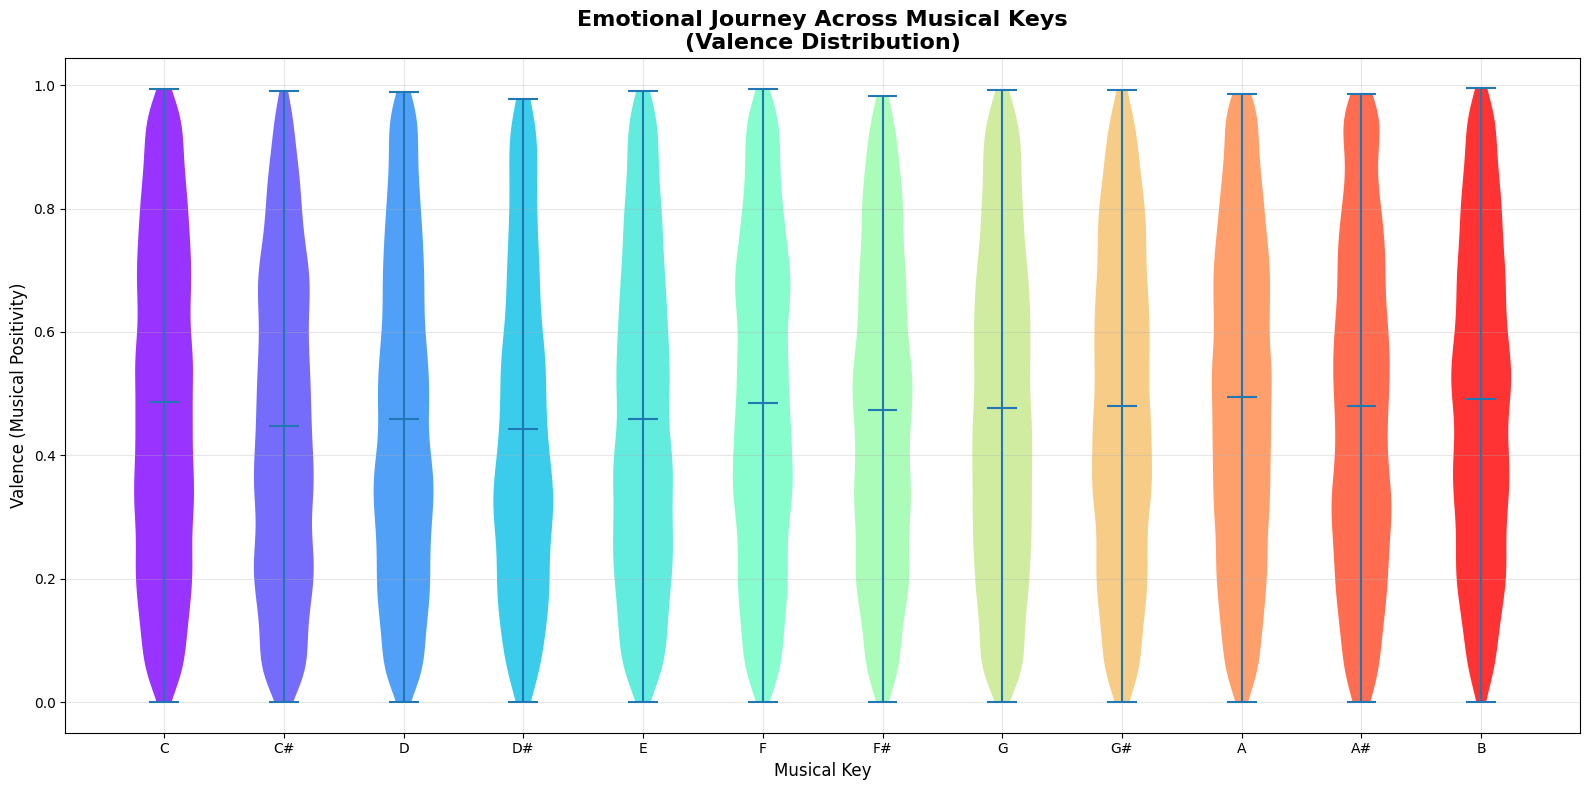

In [ ]:
# Create violin plots showing valence distribution across musical keys
fig, ax = plt.subplots(figsize=(16, 8))

key_labels = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
colors = plt.cm.rainbow(np.linspace(0, 1, 12))

valence_by_key = [df[df['key'] == i]['valence'].dropna() for i in range(12)]

parts = ax.violinplot(valence_by_key, positions=range(12), showmeans=True, showextrema=True)

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.8)

ax.set_xlabel('Musical Key', fontsize=12)
ax.set_ylabel('Valence (Musical Positivity)', fontsize=12)
ax.set_title('Emotional Journey Across Musical Keys\n(Valence Distribution)',
             fontsize=16, fontweight='bold')
ax.set_xticks(range(12))
ax.set_xticklabels(key_labels)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


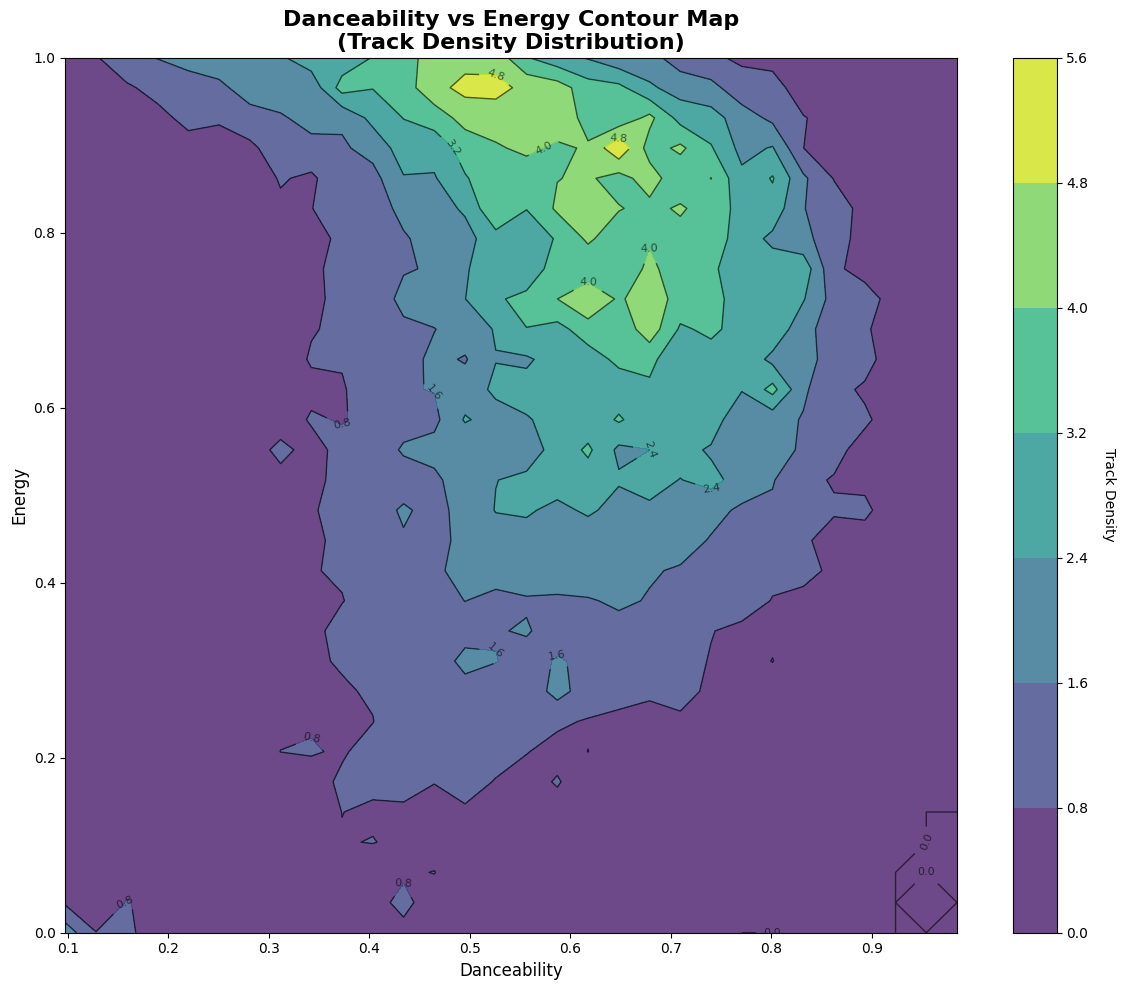

In [ ]:
# Create a contour plot showing density of tracks in danceability-energy space
fig, ax = plt.subplots(figsize=(12, 10))

# Create 2D histogram data
x = df['danceability'].dropna()
y = df['energy'].dropna()

# Create contour plot
hist, xedges, yedges = np.histogram2d(x, y, bins=30, density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

contour = ax.contour(hist.T, extent=extent, colors='black', alpha=0.6, linewidths=1)
contourf = ax.contourf(hist.T, extent=extent, cmap='viridis', alpha=0.8)

ax.set_xlabel('Danceability', fontsize=12)
ax.set_ylabel('Energy', fontsize=12)
ax.set_title('Danceability vs Energy Contour Map\n(Track Density Distribution)',
             fontsize=16, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(contourf, ax=ax)
cbar.set_label('Track Density', rotation=270, labelpad=20)

# Add contour labels
ax.clabel(contour, inline=True, fontsize=8)

plt.tight_layout()
plt.show()

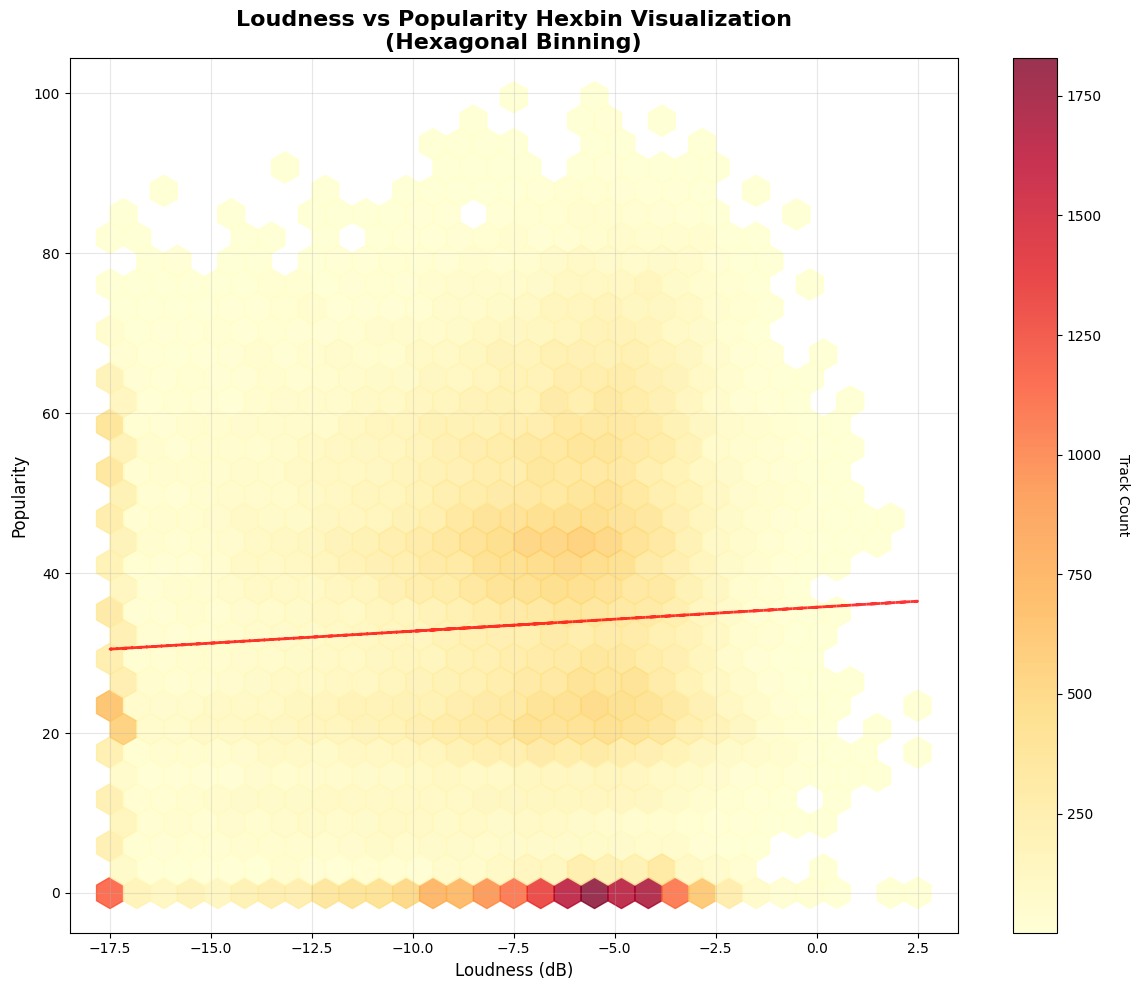

In [ ]:
# Create hexbin plot for loudness vs popularity
fig, ax = plt.subplots(figsize=(12, 10))

# Create hexbin plot
hexbin = ax.hexbin(df['loudness'], df['popularity'], gridsize=30,
                   cmap='YlOrRd', alpha=0.8, mincnt=1)

ax.set_xlabel('Loudness (dB)', fontsize=12)
ax.set_ylabel('Popularity', fontsize=12)
ax.set_title('Loudness vs Popularity Hexbin Visualization\n(Hexagonal Binning)',
             fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(hexbin, ax=ax)
cbar.set_label('Track Count', rotation=270, labelpad=20)

# Add trend line
z = np.polyfit(df['loudness'].dropna(), df[df['loudness'].notna()]['popularity'], 1)
p = np.poly1d(z)
ax.plot(df['loudness'].dropna(), p(df['loudness'].dropna()), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

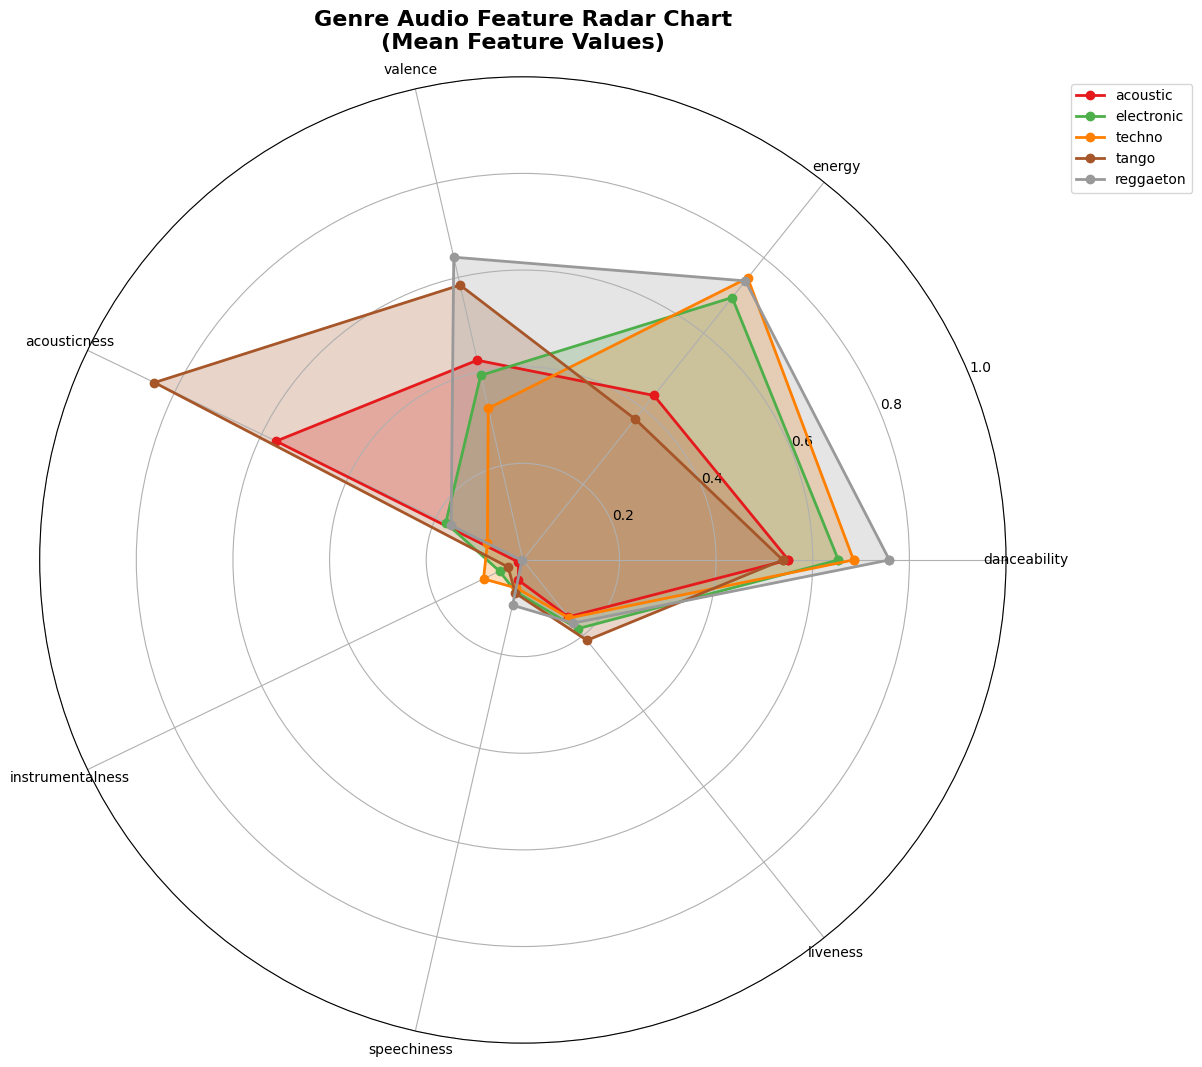

In [ ]:
# Create radar chart comparing audio features across top genres
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness',
           'speechiness', 'liveness']
top_genres = df['track_genre'].value_counts().head(5).index

# Calculate mean values for each feature by genre
genre_means = {}
for genre in top_genres:
    genre_data = df[df['track_genre'] == genre]
    genre_means[genre] = [genre_data[feature].mean() for feature in features]

# Number of variables
N = len(features)

# Compute angle for each axis
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Complete the circle

# Colors for each genre
colors = plt.cm.Set1(np.linspace(0, 1, len(top_genres)))

# Plot data for each genre
for i, genre in enumerate(top_genres):
    values = genre_means[genre]
    values += values[:1]  # Complete the circle

    ax.plot(angles, values, 'o-', linewidth=2, label=genre, color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)
ax.set_ylim(0, 1)
ax.set_title('Genre Audio Feature Radar Chart\n(Mean Feature Values)',
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
ax.grid(True)

plt.tight_layout()
plt.show()


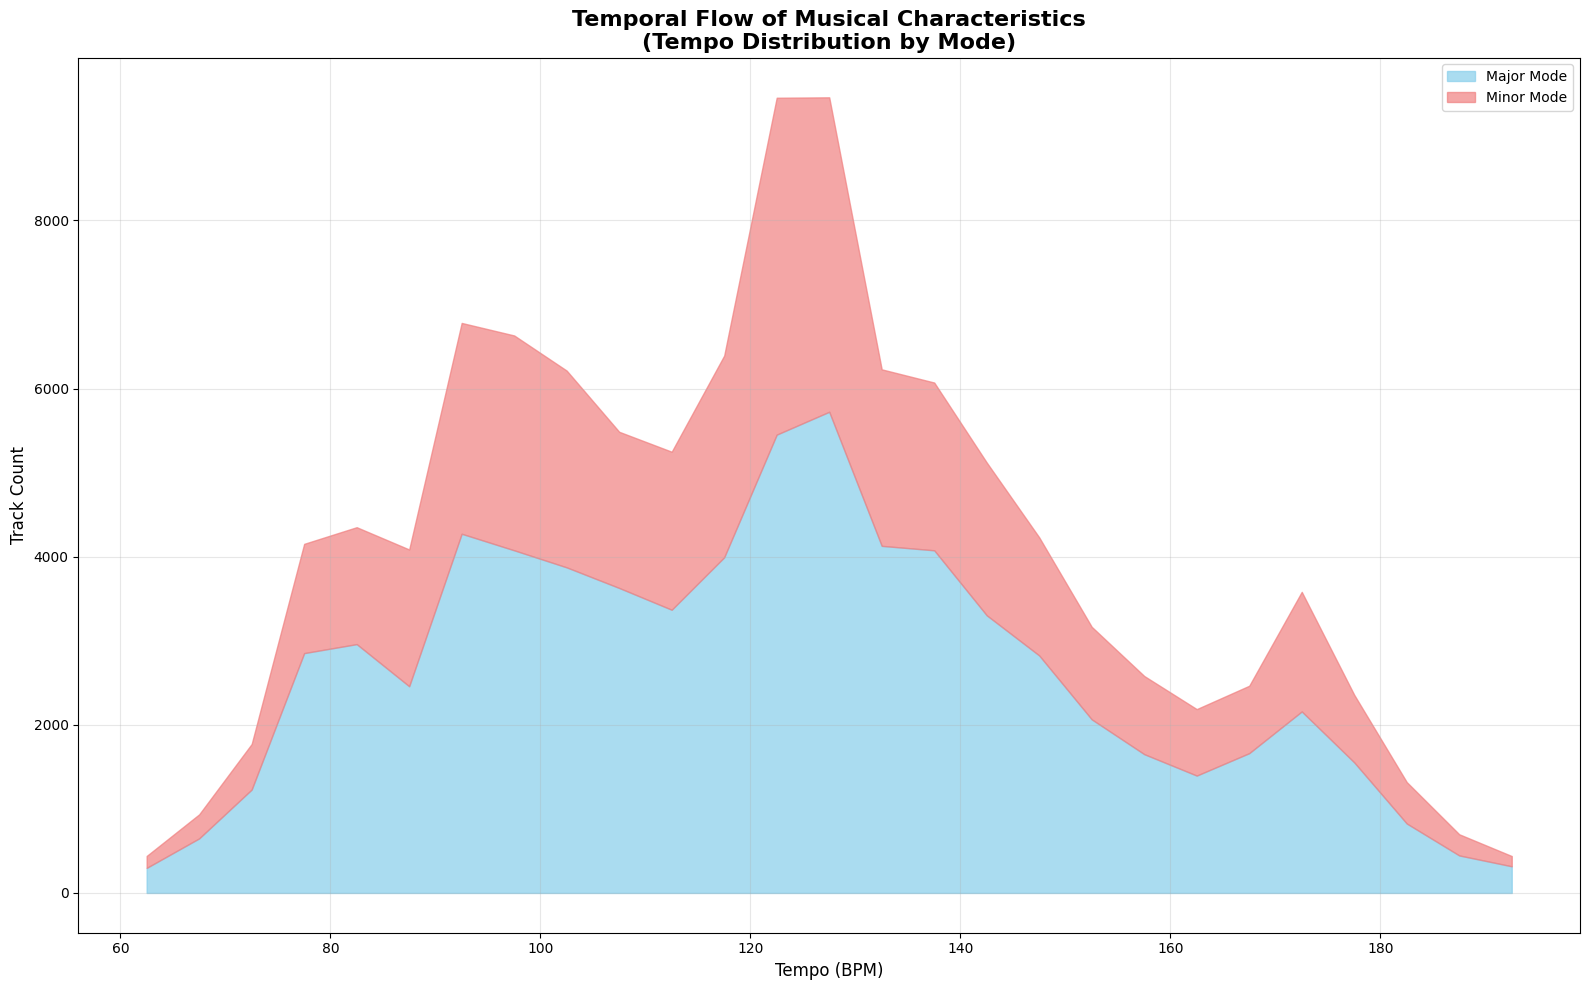

In [ ]:
# Create streamgraph-style visualization of tempo distribution by mode
fig, ax = plt.subplots(figsize=(16, 10))

# Create tempo bins
tempo_bins = np.arange(60, 200, 5)
tempo_centers = (tempo_bins[:-1] + tempo_bins[1:]) / 2

# Calculate distributions for major and minor modes
major_counts = []
minor_counts = []

for i in range(len(tempo_bins)-1):
    major_mask = (df['tempo'] >= tempo_bins[i]) & (df['tempo'] < tempo_bins[i+1]) & (df['mode'] == 1)
    minor_mask = (df['tempo'] >= tempo_bins[i]) & (df['tempo'] < tempo_bins[i+1]) & (df['mode'] == 0)

    major_counts.append(major_mask.sum())
    minor_counts.append(minor_mask.sum())

# Create stacked area plot
ax.fill_between(tempo_centers, 0, major_counts, alpha=0.7, color='skyblue', label='Major Mode')
ax.fill_between(tempo_centers, major_counts,
                np.array(major_counts) + np.array(minor_counts),
                alpha=0.7, color='lightcoral', label='Minor Mode')

ax.set_xlabel('Tempo (BPM)', fontsize=12)
ax.set_ylabel('Track Count', fontsize=12)
ax.set_title('Temporal Flow of Musical Characteristics\n(Tempo Distribution by Mode)',
             fontsize=16, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

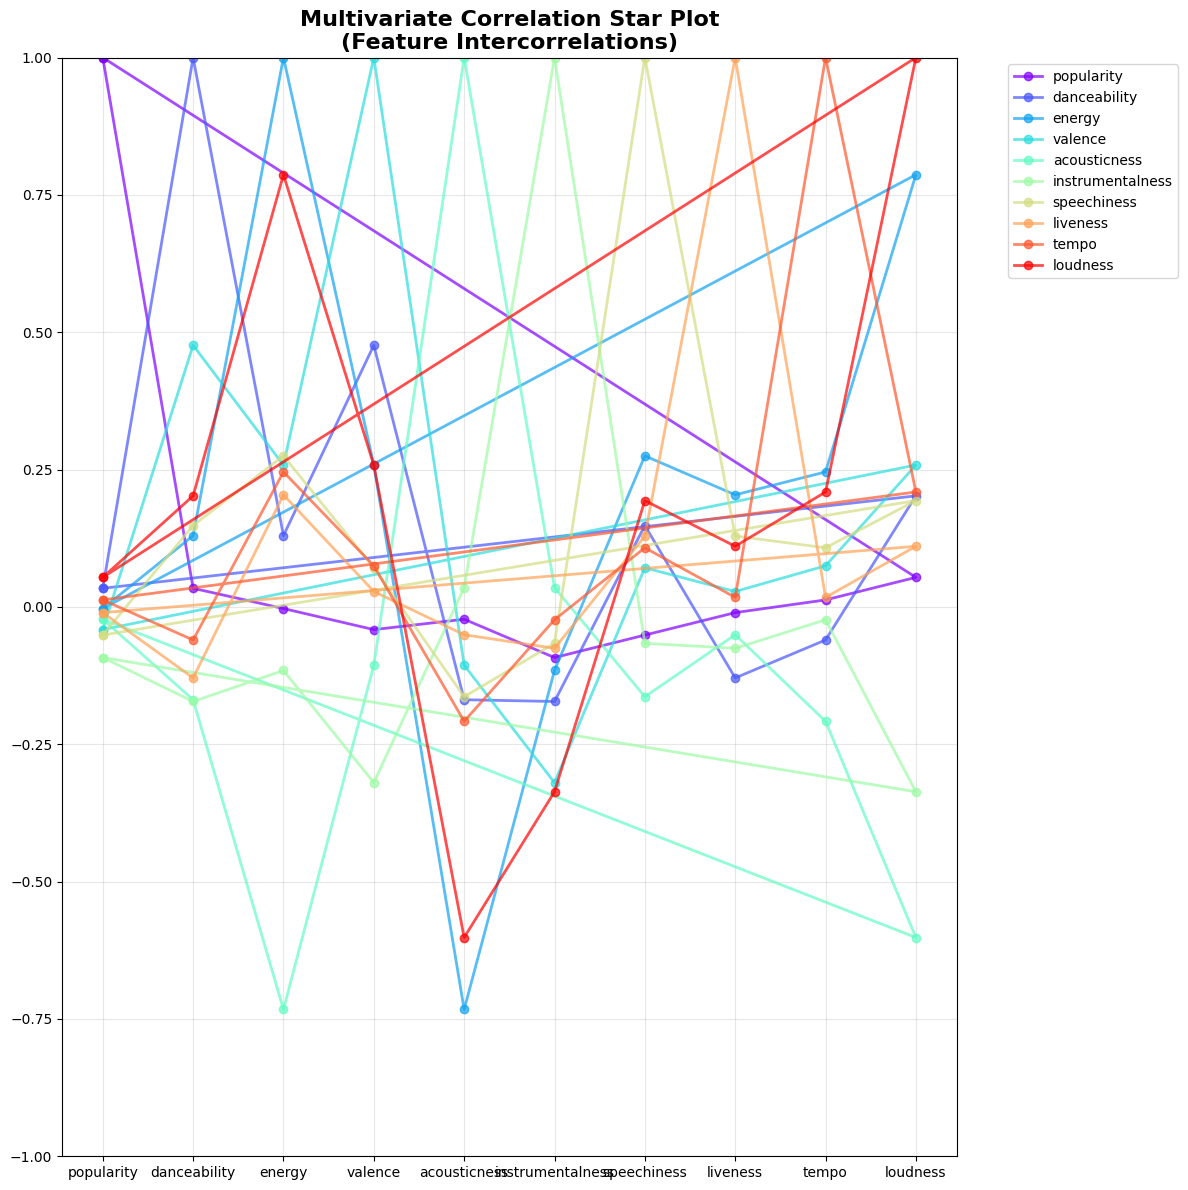

In [ ]:
# Create star plot showing correlations between multiple audio features
fig, ax = plt.subplots(figsize=(12, 12))

# Select numerical features for correlation
features = ['popularity', 'danceability', 'energy', 'valence', 'acousticness',
           'instrumentalness', 'speechiness', 'liveness', 'tempo', 'loudness']

# Calculate correlation matrix
corr_matrix = df[features].corr()

# Create star plot
n_features = len(features)
angles = np.linspace(0, 2 * np.pi, n_features, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# Plot correlations for each feature with others
colors = plt.cm.rainbow(np.linspace(0, 1, n_features))

for i, feature in enumerate(features):
    values = corr_matrix[feature].values.tolist()
    values += values[:1]  # Complete the circle

    ax.plot(angles, values, 'o-', linewidth=2, alpha=0.7,
            color=colors[i], label=feature)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(features, fontsize=10)
ax.set_ylim(-1, 1)
ax.set_title('Multivariate Correlation Star Plot\n(Feature Intercorrelations)',
             fontsize=16, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()